# Telecom Churn

Statistical Quantitative Data:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

Business Objective:
    
Actions taken to obtain qualitative data-
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers 
at high risk of churn and identify the main indicators of churn.

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the day dataset of Telecom_Churn

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries to read the csv file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import parallel_backend
from sklearn import metrics



import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

In [3]:
telecom=pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

## Step 2: Data Preprocessing

#### Checking for null values

In [7]:
# Checking the null values
telecom.isnull().values.sum()

3594931

In [8]:
round(100*(telecom.loc[:,'mobile_number':'roam_og_mou_9'].isnull().mean()), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
dtype: float64

In [9]:
round(100*(telecom.loc[:,'loc_og_t2t_mou_6':'spl_og_mou_9'].isnull().mean()), 2)

loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_6    3.94
std_og_t2m_mou_7    3.86
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_6    3.94
std_og_t2f_mou_7    3.86
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_6    3.94
std_og_t2c_mou_7    3.86
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_6        3.94
std_og_mou_7        3.86
std_og_mou_8        5.38
std_og_mou_9        7.75


In [10]:
round(100*(telecom.loc[:,'og_others_6':'total_ic_mou_9'].isnull().mean()), 2)

og_others_6         3.94
og_others_7         3.86
og_others_8         5.38
og_others_9         7.75
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
total_og_mou_9      0.00
loc_ic_t2t_mou_6    3.94
loc_ic_t2t_mou_7    3.86
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_6    3.94
loc_ic_t2m_mou_7    3.86
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_6    3.94
loc_ic_t2f_mou_7    3.86
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75
loc_ic_mou_6        3.94
loc_ic_mou_7        3.86
loc_ic_mou_8        5.38
loc_ic_mou_9        7.75
std_ic_t2t_mou_6    3.94
std_ic_t2t_mou_7    3.86
std_ic_t2t_mou_8    5.38
std_ic_t2t_mou_9    7.75
std_ic_t2m_mou_6    3.94
std_ic_t2m_mou_7    3.86
std_ic_t2m_mou_8    5.38
std_ic_t2m_mou_9    7.75
std_ic_t2f_mou_6    3.94
std_ic_t2f_mou_7    3.86
std_ic_t2f_mou_8    5.38
std_ic_t2f_mou_9    7.75
std_ic_t2o_mou_6    3.94
std_ic_t2o_mou_7    3.86
std_ic_t2o_mou_8    5.38
std_ic_t2o_mou_9    7.75


In [11]:
round(100*(telecom.loc[:,'spl_ic_mou_6':'date_of_last_rech_9'].isnull().mean()), 2)

spl_ic_mou_6           3.94
spl_ic_mou_7           3.86
spl_ic_mou_8           5.38
spl_ic_mou_9           7.75
isd_ic_mou_6           3.94
isd_ic_mou_7           3.86
isd_ic_mou_8           5.38
isd_ic_mou_9           7.75
ic_others_6            3.94
ic_others_7            3.86
ic_others_8            5.38
ic_others_9            7.75
total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_num_9       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
max_rech_amt_9         0.00
date_of_last_rech_6    1.61
date_of_last_rech_7    1.77
date_of_last_rech_8    3.62
date_of_last_rech_9    4.76
dtype: float64

In [12]:
round(100*(telecom.loc[:,'last_day_rch_amt_6':'av_rech_amt_data_9'].isnull().mean()), 2)

last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
dtype: float64

In [13]:
round(100*(telecom.loc[:,'vol_2g_mb_6':'sep_vbc_3g'].isnull().mean()), 2)

vol_2g_mb_6          0.00
vol_2g_mb_7          0.00
vol_2g_mb_8          0.00
vol_2g_mb_9          0.00
vol_3g_mb_6          0.00
vol_3g_mb_7          0.00
vol_3g_mb_8          0.00
vol_3g_mb_9          0.00
arpu_3g_6           74.85
arpu_3g_7           74.43
arpu_3g_8           73.66
arpu_3g_9           74.08
arpu_2g_6           74.85
arpu_2g_7           74.43
arpu_2g_8           73.66
arpu_2g_9           74.08
night_pck_user_6    74.85
night_pck_user_7    74.43
night_pck_user_8    73.66
night_pck_user_9    74.08
monthly_2g_6         0.00
monthly_2g_7         0.00
monthly_2g_8         0.00
monthly_2g_9         0.00
sachet_2g_6          0.00
sachet_2g_7          0.00
sachet_2g_8          0.00
sachet_2g_9          0.00
monthly_3g_6         0.00
monthly_3g_7         0.00
monthly_3g_8         0.00
monthly_3g_9         0.00
sachet_3g_6          0.00
sachet_3g_7          0.00
sachet_3g_8          0.00
sachet_3g_9          0.00
fb_user_6           74.85
fb_user_7           74.43
fb_user_8   

In [14]:
# Let us remove those columns having null value percentage of more than 70%

telecom=telecom.drop(telecom.loc[:,'date_of_last_rech_data_6':'date_of_last_rech_data_9'].columns,axis=1)

In [15]:
telecom=telecom.drop(telecom.loc[:,'arpu_3g_6' : 'night_pck_user_9'].columns,axis=1)

In [16]:
telecom=telecom.drop(telecom.loc[:,'fb_user_6' : 'fb_user_9'].columns,axis=1)

In [17]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=206)

In [18]:
# Renaming the columns to format given in the dataset

telecom.rename(columns = {'jun_vbc_3g': 'vbc_3g_6',
                          'jul_vbc_3g': 'vbc_3g_7',
                          'aug_vbc_3g': 'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace = True)


### Imputation

In [19]:
# Here we are imputing the null values with mode values in these columns

telecom['total_rech_data_6'].fillna(telecom['total_rech_data_6'].mode()[0], inplace=True)

telecom['total_rech_data_7'].fillna(telecom['total_rech_data_7'].mode()[0], inplace=True)

telecom['total_rech_data_8'].fillna(telecom['total_rech_data_8'].mode()[0], inplace=True)

telecom['total_rech_data_9'].fillna(telecom['total_rech_data_9'].mode()[0], inplace=True)


In [20]:
# Here we are imputing the null values with mode values in these columns

telecom['max_rech_data_6'].fillna(telecom['max_rech_data_6'].mode()[0], inplace=True)

telecom['max_rech_data_7'].fillna(telecom['max_rech_data_7'].mode()[0], inplace=True)

telecom['max_rech_data_8'].fillna(telecom['max_rech_data_8'].mode()[0], inplace=True)

telecom['max_rech_data_9'].fillna(telecom['max_rech_data_9'].mode()[0], inplace=True)

In [21]:
# Here we are imputing the null values with mode values in these columns

telecom['count_rech_2g_6'].fillna(telecom['count_rech_2g_6'].mode()[0], inplace=True)

telecom['count_rech_2g_7'].fillna(telecom['count_rech_2g_7'].mode()[0], inplace=True)

telecom['count_rech_2g_8'].fillna(telecom['count_rech_2g_8'].mode()[0], inplace=True)

telecom['count_rech_2g_9'].fillna(telecom['count_rech_2g_9'].mode()[0], inplace=True)

In [22]:
# Here we are imputing the null values with mode values in these columns

telecom['count_rech_3g_6'].fillna(telecom['count_rech_3g_6'].mode()[0], inplace=True)

telecom['count_rech_3g_7'].fillna(telecom['count_rech_3g_7'].mode()[0], inplace=True)

telecom['count_rech_3g_8'].fillna(telecom['count_rech_3g_8'].mode()[0], inplace=True)

telecom['count_rech_3g_9'].fillna(telecom['count_rech_3g_9'].mode()[0], inplace=True)

In [23]:
# Here we are imputing the null values because there exists mean values in these columns

telecom['av_rech_amt_data_6'].fillna(telecom['av_rech_amt_data_6'].mean(), inplace=True)

telecom['av_rech_amt_data_7'].fillna(telecom['av_rech_amt_data_7'].mean(), inplace=True)

telecom['av_rech_amt_data_8'].fillna(telecom['av_rech_amt_data_8'].mean(), inplace=True)

telecom['av_rech_amt_data_9'].fillna(telecom['av_rech_amt_data_9'].mean(), inplace=True)

In [24]:
telecom.shape

(99999, 206)

In [25]:
# As dataframe's rows of the columns having null values with less percentage are dropped
telecom=telecom.dropna()

In [26]:
round(100*(telecom.isnull().mean()), 2)

mobile_number     0.0
circle_id         0.0
loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
                 ... 
aon               0.0
vbc_3g_8          0.0
vbc_3g_7          0.0
vbc_3g_6          0.0
vbc_3g_9          0.0
Length: 206, dtype: float64

In [27]:
# Let us check whether telecom dataframe is having null value anymore
telecom.isnull().values.any()

False

In [28]:
telecom.shape

(84185, 206)

#### Checking for Outliers

In [29]:
# Checking outliers at 25%, 50%, 75%, 90% , 95% and 1
telecom.describe(percentiles=[.25, .5, .75, .90, .95, 1])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   8.418500e+04    84185.0         84185.0         84185.0   
mean    7.001227e+09      109.0             0.0             0.0   
std     6.879239e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001235e+09      109.0             0.0             0.0   
75%     7.001822e+09      109.0             0.0             0.0   
90%     7.002176e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
100%    7.002411e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         84185.0  84185.000000  84185.000000  84185.000000  84185.000000   
mean              0.0    294.902871    298.714947    304.333608    290.683456   
std               0.0    328.760913    342.675529    352.369638    350.229101   
min               0.0   -810.661000   -622.509000   -345.129000  -1474.195000   
25%               0.0    101.690000    103.141000    106.726000     93.483000   
50%               0.0    209.143000    211.112000    215.082000    204.795000   
75%               0.0    385.127000    388.069000    396.269000    384.121000   
90%               0.0    636.318600    643.659200    649.600000    634.646000   
95%               0.0    847.509800    855.624600    863.732800    843.289600   
100%              0.0  27731.088000  35145.834000  33543.624000  38805.617000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...  monthly_3g_9   sachet_3g_6   sachet_3g_7  \
count  84185.000000  ...  84185.000000  84185.000000  84185.000000   
mean     133.736664  ...      0.092831      0.076914      0.084302   
std      297.864522  ...      0.400950      0.578251      0.638150   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.990000  ...      0.000000      0.000000      0.000000   
50%       35.430000  ...      0.000000      0.000000      0.000000   
75%      120.580000  ...      0.000000      0.000000      0.000000   
90%      348.140000  ...      0.000000      0.000000      0.000000   
95%      618.246000  ...      1.000000      0.000000      0.000000   
100%    7376.710000  ...     11.000000     29.000000     33.000000   
max     7376.710000  ...     11.000000     29.000000     33.000000   

        sachet_3g_8   sachet_3g_9           aon      vbc_3g_8      vbc_3g_7  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean       0.092534      0.094126   1273.130083     74.943136     71.805762   
std        0.700907      0.688381    965.107844    278.726313    281.320228   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    485.000000      0.000000      0.000000   
50%        0.000000      0.000000    936.000000      0.000000      0.000000   
75%        0.000000      0.000000   1948.000000      0.000000      0.000000   
90%        0.000000      0.000000   2845.000000    200.604000    168.154000   
95%        0.000000      0.000000   3144.000000    512.752000    485.210000   
100%      41.000000     49.000000   4337.000000  12916.220000   9165.600000   
max       41.000000     49.000000   4337.000000  12916.220000   9165.600000   

           vbc_3g_6      vbc_3g_9  
count  84185.000000  84185.000000  
mean      63.273043      3.737929  
std      260.105991     34.528453  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
90%      131.262000      0.000000  
95%      420.826000      2.258000  
100%   11166.210000   2618.570000  
max    11166.210000   2618.570000  

[11 ro

In [30]:
# We segregate the dataset in to object and non-object type to deal them accordingly
telecom_non_object=telecom.select_dtypes(exclude=['object'])
telecom_non_object

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
5         7000286308        109             0.0             0.0   
...              ...        ...             ...             ...   
99991     7000342369        109             0.0             0.0   
99992     7000641584        109             0.0             0.0   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  \
1                 0.0   34.047  355.074  268.321   86.285        24.11  ...   
2                 0.0  167.690  189.058  210.226  290.714        11.54  ...   
3                 0.0  221.338  251.102  508.054  389.500        99.91  ...   
4                 0.0  261.636  309.876  238.174  163.426        50.31  ...   
5                 0.0   50.258   58.810   83.386  170.826        50.16  ...   
...               ...      ...      ...      ...      ...          ...  ...   
99991             0.0  118.065  158.212  171.692  145.714        26.24  ...   
99992             0.0  100.073  155.667  213.010  194.063        80.44  ...   
99994             0.0   18.471   69.161   57.530   29.950         5.40  ...   
99995             0.0  112.201   77.811   79.081  140.835        29.26  ...   
99997             0.0  322.991  303.386  606.817  731.010         0.00  ...   

       monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  \
1                 0            0            0            0            0  1006   
2                 0            0            0            0            0  1103   
3                 0            0            0            0            0  2491   
4                 0            0            0            0            0  1526   
5                 0            0            0            0            0  1471   
...             ...          ...          ...          ...          ...   ...   
99991             0            0            0            0            0   256   
99992             0            0            0            0            0  1168   
99994             0            0            0            0            0  3199   
99995             0            0            0            0            0  2052   
99997             4            1            0            0            0   478   

       vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
1          0.00      0.00      0.00       0.0  
2          0.00      0.00      4.17       0.0  
3          0.00      0.00      0.00       0.0  
4          0.00      0.00      0.00       0.0  
5          0.00      0.00      0.00       0.0  
...         ...       ...       ...       ...  
99991      0.00      0.00      0.00       0.0  
99992      0.00      0.00      0.00       0.0  
99994      0.00      0.00      0.00       0.0  
99995      0.00      0.00      0.00       0.0  
99997   1445.74   1151.03   1173.18       0.0  

[84185 rows x 198 columns]

In [31]:
telecom_non_object.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=198)

In [32]:
telecom_non_object.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
vbc_3g_8          float64
vbc_3g_7          float64
vbc_3g_6          float64
vbc_3g_9          float64
Length: 198, dtype: object

In [33]:
telecom_non_object.shape

(84185, 198)

In [34]:
# Remove columns having only '0' values

zero_col=[]
a=0
for col in telecom_non_object.columns:
    a=a+1
    count=0
    for row in telecom_non_object[col]:
        if row==0:
            count=count+1
        #count=0
    if len(telecom_non_object[col])==count:  
        zero_col.append(col)
    
#for col in telecom_non_object.columns:
    if len(telecom_non_object[col])==count:   
        telecom_non_object.drop([col],axis=1,inplace=True)

#print(\n)        
print('Total no. of columns',a,'\n')
#print(\n)
print('Columns having only zero values',zero_col,'\n')
print('no. of columns having only zero values',len(zero_col))

Total no. of columns 198 

Columns having only zero values ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'] 

no. of columns having only zero values 11


In [35]:
telecom_non_object.shape

(84185, 187)

In [36]:
telecom_non_object.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   8.418500e+04    84185.0  84185.000000  84185.000000  84185.000000   
mean    7.001227e+09      109.0    294.902871    298.714947    304.333608   
std     6.879239e+05        0.0    328.760913    342.675529    352.369638   
min     7.000000e+09      109.0   -810.661000   -622.509000   -345.129000   
25%     7.000641e+09      109.0    101.690000    103.141000    106.726000   
50%     7.001235e+09      109.0    209.143000    211.112000    215.082000   
75%     7.001822e+09      109.0    385.127000    388.069000    396.269000   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

             arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean     290.683456    133.736664    139.335098    138.625100    133.463409   
std      350.229101    297.864522    314.771030    315.778408    311.957477   
min    -1474.195000      0.000000      0.000000      0.000000      0.000000   
25%       93.483000      7.990000      7.910000      7.860000      6.380000   
50%      204.795000     35.430000     35.390000     35.080000     32.110000   
75%      384.121000    120.580000    122.960000    122.430000    116.080000   
max    38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

       ...  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  ...  84185.000000  84185.000000  84185.000000  84185.000000   
mean   ...      0.092831      0.076914      0.084302      0.092534   
std    ...      0.400950      0.578251      0.638150      0.700907   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     11.000000     29.000000     33.000000     41.000000   

        sachet_3g_9           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean       0.094126   1273.130083     74.943136     71.805762     63.273043   
std        0.688381    965.107844    278.726313    281.320228    260.105991   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    485.000000      0.000000      0.000000      0.000000   
50%        0.000000    936.000000      0.000000      0.000000      0.000000   
75%        0.000000   1948.000000      0.000000      0.000000      0.000000   
max       49.000000   4337.000000  12916.220000   9165.600000  11166.210000   

           vbc_3g_9  
count  84185.000000  
mean       3.737929  
std       34.528453  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     2618.570000  

[8 rows x 187 columns]

#### Dealing with outliers using quantiles

In [37]:
telecom_non_object.describe(percentiles=[.25, .10, .70, .90, .95, 1])

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   8.418500e+04    84185.0  84185.000000  84185.000000  84185.000000   
mean    7.001227e+09      109.0    294.902871    298.714947    304.333608   
std     6.879239e+05        0.0    328.760913    342.675529    352.369638   
min     7.000000e+09      109.0   -810.661000   -622.509000   -345.129000   
10%     7.000265e+09      109.0     46.118200     48.192800     48.216800   
25%     7.000641e+09      109.0    101.690000    103.141000    106.726000   
50%     7.001235e+09      109.0    209.143000    211.112000    215.082000   
70%     7.001704e+09      109.0    338.712000    340.449400    348.483400   
90%     7.002176e+09      109.0    636.318600    643.659200    649.600000   
95%     7.002291e+09      109.0    847.509800    855.624600    863.732800   
100%    7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

             arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean     290.683456    133.736664    139.335098    138.625100    133.463409   
std      350.229101    297.864522    314.771030    315.778408    311.957477   
min    -1474.195000      0.000000      0.000000      0.000000      0.000000   
10%       32.645200      0.480000      0.550000      0.480000      0.000000   
25%       93.483000      7.990000      7.910000      7.860000      6.380000   
50%      204.795000     35.430000     35.390000     35.080000     32.110000   
70%      335.175400     92.960000     93.256000     93.390000     87.510000   
90%      634.646000    348.140000    362.880000    360.830000    350.002000   
95%      843.289600    618.246000    649.656000    642.810000    625.742000   
100%   38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   
max    38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

       ...  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  ...  84185.000000  84185.000000  84185.000000  84185.000000   
mean   ...      0.092831      0.076914      0.084302      0.092534   
std    ...      0.400950      0.578251      0.638150      0.700907   
min    ...      0.000000      0.000000      0.000000      0.000000   
10%    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
70%    ...      0.000000      0.000000      0.000000      0.000000   
90%    ...      0.000000      0.000000      0.000000      0.000000   
95%    ...      1.000000      0.000000      0.000000      0.000000   
100%   ...     11.000000     29.000000     33.000000     41.000000   
max    ...     11.000000     29.000000     33.000000     41.000000   

        sachet_3g_9           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean       0.094126   1273.130083     74.943136     71.805762     63.273043   
std        0.688381    965.107844    278.726313    281.320228    260.105991   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
10%        0.000000    301.400000      0.000000      0.000000      0.000000   
25%        0.000000    485.000000      0.000000      0.000000      0.000000   
50%        0.000000    936.000000      0.000000      0.000000      0.000000   
70%        0.000000   1623.000000      0.000000      0.000000      0.000000   
90%        0.000000   2845.000000    200.604000    168.154000    131.262000   
95%        0.000000   3144.000000    512.752000    485.210000    420.826000   
100%      49.000000   4337.000000  12916.220000   9165.600000  11166.210000   
max       49.000000   4337.000000  12916.220000   9165.600000  11166.210000   

           vbc_3g_9  
count  84185.000

In [38]:
# We use 'quantiles' method to deal with outliers. We do have negative values and high positive values as the extreme
# values or outliers which should be removed.

low = .05
high = .95
quant_telecom = telecom_non_object.quantile([low, high])
print(quant_telecom)

      mobile_number  circle_id    arpu_6    arpu_7    arpu_8    arpu_9  \
0.05   7.000139e+09      109.0   21.0920   25.5382   23.4344    8.7300   
0.95   7.002291e+09      109.0  847.5098  855.6246  863.7328  843.2896   

      onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  ...  monthly_3g_9  \
0.05        0.000        0.000         0.00        0.000  ...           0.0   
0.95      618.246      649.656       642.81      625.742  ...           1.0   

      sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9     aon  vbc_3g_8  \
0.05          0.0          0.0          0.0          0.0   239.0     0.000   
0.95          0.0          0.0          0.0          0.0  3144.0   512.752   

      vbc_3g_7  vbc_3g_6  vbc_3g_9  
0.05      0.00     0.000     0.000  
0.95    485.21   420.826     2.258  

[2 rows x 187 columns]


In [39]:
# Extracting the data seperating it from low and high quantiles or outliers
telecom_non_object = telecom_non_object.apply(lambda x: x[(x>quant_telecom.loc[low,x.name]) | 
                                    (x<quant_telecom.loc[high,x.name])], axis=0)

In [40]:
telecom_non_object=telecom_non_object.drop(['mobile_number','circle_id'],axis=1)

In [41]:
telecom_non_object.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   
5   50.258   58.810   83.386  170.826        50.16        43.63        85.48   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  monthly_3g_9  sachet_3g_6  \
1        18.34         15.74         99.84  ...             0          NaN   
2        74.81        143.33        220.59  ...             0          NaN   
3       241.71        123.31        109.01  ...             0          NaN   
4        58.78         76.96         91.88  ...             0          NaN   
5       138.79         19.28         13.44  ...             0          NaN   

   sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  \
1          NaN          NaN          NaN  1006       0.0       0.0      0.00   
2          NaN          NaN          NaN  1103       0.0       0.0      4.17   
3          NaN          NaN          NaN  2491       0.0       0.0      0.00   
4          NaN          NaN          NaN  1526       0.0       0.0      0.00   
5          NaN          NaN          NaN  1471       0.0       0.0      0.00   

   vbc_3g_9  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  

[5 rows x 185 columns]

In [42]:
#telecom_non_object = pd.concat([telecom.loc[:,'mobile_number'], telecom_non_object], axis=1)
round((telecom_non_object['isd_og_mou_6'].isna().sum()/telecom_non_object.shape[0]),2)

0.95

In [43]:
# Remove columns having only 'NaN' values

null_col=[]
a=0
for col in telecom_non_object.columns:
    a=a+1
    count=0
    for row in telecom_non_object[col]:
        if row==np.nan:
            count=count+1
        #count=0
    if round((telecom_non_object[col].isna().sum()/telecom_non_object.shape[0]),2)> 0.90:  
        null_col.append(col)
    
#for col in telecom_non_object.columns:
     
        telecom_non_object.drop([col],axis=1,inplace=True)

#print(\n)        
print('Total no. of columns',a,'\n')
#print(\n)
print('Columns having only nan values',null_col,'\n')
print('no. of columns having only nan values',len(null_col))

Total no. of columns 185 

Columns having only nan values ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'og_others_7', 'og_others_8', 'og_others_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9'] 

no. of columns having only nan values 11


In [44]:
telecom_non_object.shape

(84185, 174)

In [45]:
telecom_non_object_50=telecom_non_object.iloc[:,:50]

In [46]:
telecom_non_object_50.isna().sum()

arpu_6              0
arpu_7              0
arpu_8              0
arpu_9              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
onnet_mou_9         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
offnet_mou_9        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_ic_mou_9       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
roam_og_mou_9       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2t_mou_9    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2m_mou_9    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2f_mou_9    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_t2c_mou_9    0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
loc_og_mou_9        0
std_og_t2t_mou_6    0
std_og_t2t_mou_7    0
std_og_t2t_mou_8    0
std_og_t2t_mou_9    0
std_og_t2m_mou_6    0
std_og_t2m

In [47]:
telecom_non_object_100=telecom_non_object.iloc[:,51:100]

In [48]:
telecom_non_object_100.isna().sum()

std_og_t2f_mou_9    0
std_og_mou_6        0
std_og_mou_7        0
std_og_mou_8        0
std_og_mou_9        0
spl_og_mou_6        0
spl_og_mou_7        0
spl_og_mou_8        0
spl_og_mou_9        0
og_others_6         0
total_og_mou_6      0
total_og_mou_7      0
total_og_mou_8      0
total_og_mou_9      0
loc_ic_t2t_mou_6    0
loc_ic_t2t_mou_7    0
loc_ic_t2t_mou_8    0
loc_ic_t2t_mou_9    0
loc_ic_t2m_mou_6    0
loc_ic_t2m_mou_7    0
loc_ic_t2m_mou_8    0
loc_ic_t2m_mou_9    0
loc_ic_t2f_mou_6    0
loc_ic_t2f_mou_7    0
loc_ic_t2f_mou_8    0
loc_ic_t2f_mou_9    0
loc_ic_mou_6        0
loc_ic_mou_7        0
loc_ic_mou_8        0
loc_ic_mou_9        0
std_ic_t2t_mou_6    0
std_ic_t2t_mou_7    0
std_ic_t2t_mou_8    0
std_ic_t2t_mou_9    0
std_ic_t2m_mou_6    0
std_ic_t2m_mou_7    0
std_ic_t2m_mou_8    0
std_ic_t2m_mou_9    0
std_ic_t2f_mou_6    0
std_ic_t2f_mou_7    0
std_ic_t2f_mou_8    0
std_ic_t2f_mou_9    0
std_ic_mou_6        0
std_ic_mou_7        0
std_ic_mou_8        0
std_ic_mou

In [49]:
telecom_non_object_150=telecom_non_object.iloc[:,101:150]

In [50]:
telecom_non_object_150.isna().sum()

spl_ic_mou_6          0
spl_ic_mou_7          0
spl_ic_mou_8          0
spl_ic_mou_9          0
isd_ic_mou_6          0
isd_ic_mou_7          0
isd_ic_mou_8          0
isd_ic_mou_9          0
ic_others_6           0
ic_others_7           0
ic_others_8           0
ic_others_9           0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7 

In [51]:
telecom_non_object_175=telecom_non_object.iloc[:,151:175]

In [52]:
telecom_non_object_175.isna().sum()

vol_2g_mb_8     0
vol_2g_mb_9     0
vol_3g_mb_6     0
vol_3g_mb_7     0
vol_3g_mb_8     0
vol_3g_mb_9     0
monthly_2g_6    0
monthly_2g_7    0
monthly_2g_8    0
monthly_2g_9    0
sachet_2g_6     0
sachet_2g_7     0
sachet_2g_8     0
sachet_2g_9     0
monthly_3g_6    0
monthly_3g_7    0
monthly_3g_8    0
monthly_3g_9    0
aon             0
vbc_3g_8        0
vbc_3g_7        0
vbc_3g_6        0
vbc_3g_9        0
dtype: int64

In [53]:
telecom_non_object.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=174)

In [54]:
telecom_non_object.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=174)

In [55]:
telecom_non_object.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   
5   50.258   58.810   83.386  170.826        50.16        43.63        85.48   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  sachet_2g_9  monthly_3g_6  \
1        18.34         15.74         99.84  ...            0             0   
2        74.81        143.33        220.59  ...            1             0   
3       241.71        123.31        109.01  ...            0             0   
4        58.78         76.96         91.88  ...            0             0   
5       138.79         19.28         13.44  ...            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9   aon  vbc_3g_8  vbc_3g_7  \
1             0             0             0  1006       0.0       0.0   
2             0             0             0  1103       0.0       0.0   
3             0             0             0  2491       0.0       0.0   
4             0             0             0  1526       0.0       0.0   
5             0             0             0  1471       0.0       0.0   

   vbc_3g_6  vbc_3g_9  
1      0.00       0.0  
2      4.17       0.0  
3      0.00       0.0  
4      0.00       0.0  
5      0.00       0.0  

[5 rows x 174 columns]

In [56]:
telecom_non_object.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean     294.902871    298.714947    304.333608    290.683456    133.736664   
std      328.760913    342.675529    352.369638    350.229101    297.864522   
min     -810.661000   -622.509000   -345.129000  -1474.195000      0.000000   
25%      101.690000    103.141000    106.726000     93.483000      7.990000   
50%      209.143000    211.112000    215.082000    204.795000     35.430000   
75%      385.127000    388.069000    396.269000    384.121000    120.580000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean     139.335098    138.625100    133.463409    200.245199    205.193976   
std      314.771030    315.778408    311.957477    314.996690    329.672368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.910000      7.860000      6.380000     36.510000     36.310000   
50%       35.390000     35.080000     32.110000     98.690000     98.580000   
75%      122.960000    122.430000    116.080000    236.490000    238.210000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       ...   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
count  ...  84185.000000  84185.000000  84185.000000  84185.000000   
mean   ...      0.446659      0.075263      0.080252      0.086785   
std    ...      1.428000      0.364311      0.397683      0.397296   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     40.000000     14.000000     16.000000     16.000000   

       monthly_3g_9           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean       0.092831   1273.130083     74.943136     71.805762     63.273043   
std        0.400950    965.107844    278.726313    281.320228    260.105991   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    485.000000      0.000000      0.000000      0.000000   
50%        0.000000    936.000000      0.000000      0.000000      0.000000   
75%        0.000000   1948.000000      0.000000      0.000000      0.000000   
max       11.000000   4337.000000  12916.220000   9165.600000  11166.210000   

           vbc_3g_9  
count  84185.000000  
mean       3.737929  
std       34.528453  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     2618.570000  

[8 rows x 174 columns]

In [57]:
telecom_non_object.dropna()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
1       34.047  355.074  268.321   86.285        24.11        78.68   
2      167.690  189.058  210.226  290.714        11.54        55.24   
3      221.338  251.102  508.054  389.500        99.91        54.39   
4      261.636  309.876  238.174  163.426        50.31       149.44   
5       50.258   58.810   83.386  170.826        50.16        43.63   
...        ...      ...      ...      ...          ...          ...   
99991  118.065  158.212  171.692  145.714        26.24        43.61   
99992  100.073  155.667  213.010  194.063        80.44        74.33   
99994   18.471   69.161   57.530   29.950         5.40         3.36   
99995  112.201   77.811   79.081  140.835        29.26        18.13   
99997  322.991  303.386  606.817  731.010         0.00         0.00   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  sachet_2g_9  \
1             7.68        18.34         15.74         99.84  ...            0   
2            37.26        74.81        143.33        220.59  ...            1   
3           310.98       241.71        123.31        109.01  ...            0   
4            83.89        58.78         76.96         91.88  ...            0   
5            85.48       138.79         19.28         13.44  ...            0   
...            ...          ...           ...           ...  ...          ...   
99991        33.43        19.88         42.23         64.83  ...            0   
99992       101.34       103.66         64.08        130.31  ...            0   
99994         5.91         0.00         15.19         54.46  ...            0   
99995        16.06        49.49        100.83         69.01  ...            0   
99997         0.00         0.00          0.00          0.00  ...            0   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   aon  vbc_3g_8  \
1                 0             0             0             0  1006      0.00   
2                 0             0             0             0  1103      0.00   
3                 0             0             0             0  2491      0.00   
4                 0             0             0             0  1526      0.00   
5                 0             0             0             0  1471      0.00   
...             ...           ...           ...           ...   ...       ...   
99991             0             0             0             0   256      0.00   
99992             0             0             0             0  1168      0.00   
99994             0             0             0             0  3199      0.00   
99995             0             0             0             0  2052      0.00   
99997             1             2             4             4   478   1445.74   

       vbc_3g_7  vbc_3g_6  vbc_3g_9  
1          0.00      0.00       0.0  
2          0.00      4.17       0.0  
3          0.00      0.00       0.0  
4          0.00      0.00       0.0  
5          0.00      0.00       0.0  
...         ...       ...       ...  
99991      0.00      0.00       0.0  
99992      0.00      0.00       0.0  
99994      0.00      0.00       0.0  
99995      0.00      0.00       0.0  
99997   1151.03   1173.18       0.0  

[84185 rows x 174 columns]

In [58]:
telecom_non_object.isna().values.sum()

0

In [59]:
telecom_non_object.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   
5   50.258   58.810   83.386  170.826        50.16        43.63        85.48   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  sachet_2g_9  monthly_3g_6  \
1        18.34         15.74         99.84  ...            0             0   
2        74.81        143.33        220.59  ...            1             0   
3       241.71        123.31        109.01  ...            0             0   
4        58.78         76.96         91.88  ...            0             0   
5       138.79         19.28         13.44  ...            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9   aon  vbc_3g_8  vbc_3g_7  \
1             0             0             0  1006       0.0       0.0   
2             0             0             0  1103       0.0       0.0   
3             0             0             0  2491       0.0       0.0   
4             0             0             0  1526       0.0       0.0   
5             0             0             0  1471       0.0       0.0   

   vbc_3g_6  vbc_3g_9  
1      0.00       0.0  
2      4.17       0.0  
3      0.00       0.0  
4      0.00       0.0  
5      0.00       0.0  

[5 rows x 174 columns]

In [60]:
telecom_non_object

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
1       34.047  355.074  268.321   86.285        24.11        78.68   
2      167.690  189.058  210.226  290.714        11.54        55.24   
3      221.338  251.102  508.054  389.500        99.91        54.39   
4      261.636  309.876  238.174  163.426        50.31       149.44   
5       50.258   58.810   83.386  170.826        50.16        43.63   
...        ...      ...      ...      ...          ...          ...   
99991  118.065  158.212  171.692  145.714        26.24        43.61   
99992  100.073  155.667  213.010  194.063        80.44        74.33   
99994   18.471   69.161   57.530   29.950         5.40         3.36   
99995  112.201   77.811   79.081  140.835        29.26        18.13   
99997  322.991  303.386  606.817  731.010         0.00         0.00   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  sachet_2g_9  \
1             7.68        18.34         15.74         99.84  ...            0   
2            37.26        74.81        143.33        220.59  ...            1   
3           310.98       241.71        123.31        109.01  ...            0   
4            83.89        58.78         76.96         91.88  ...            0   
5            85.48       138.79         19.28         13.44  ...            0   
...            ...          ...           ...           ...  ...          ...   
99991        33.43        19.88         42.23         64.83  ...            0   
99992       101.34       103.66         64.08        130.31  ...            0   
99994         5.91         0.00         15.19         54.46  ...            0   
99995        16.06        49.49        100.83         69.01  ...            0   
99997         0.00         0.00          0.00          0.00  ...            0   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   aon  vbc_3g_8  \
1                 0             0             0             0  1006      0.00   
2                 0             0             0             0  1103      0.00   
3                 0             0             0             0  2491      0.00   
4                 0             0             0             0  1526      0.00   
5                 0             0             0             0  1471      0.00   
...             ...           ...           ...           ...   ...       ...   
99991             0             0             0             0   256      0.00   
99992             0             0             0             0  1168      0.00   
99994             0             0             0             0  3199      0.00   
99995             0             0             0             0  2052      0.00   
99997             1             2             4             4   478   1445.74   

       vbc_3g_7  vbc_3g_6  vbc_3g_9  
1          0.00      0.00       0.0  
2          0.00      4.17       0.0  
3          0.00      0.00       0.0  
4          0.00      0.00       0.0  
5          0.00      0.00       0.0  
...         ...       ...       ...  
99991      0.00      0.00       0.0  
99992      0.00      0.00       0.0  
99994      0.00      0.00       0.0  
99995      0.00      0.00       0.0  
99997   1151.03   1173.18       0.0  

[84185 rows x 174 columns]

In [61]:
telecom_merge= telecom_non_object.copy()

In [62]:
telecom_merge.isnull().values.sum()

0

In [63]:
telecom_merge.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   
5   50.258   58.810   83.386  170.826        50.16        43.63        85.48   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  sachet_2g_9  monthly_3g_6  \
1        18.34         15.74         99.84  ...            0             0   
2        74.81        143.33        220.59  ...            1             0   
3       241.71        123.31        109.01  ...            0             0   
4        58.78         76.96         91.88  ...            0             0   
5       138.79         19.28         13.44  ...            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9   aon  vbc_3g_8  vbc_3g_7  \
1             0             0             0  1006       0.0       0.0   
2             0             0             0  1103       0.0       0.0   
3             0             0             0  2491       0.0       0.0   
4             0             0             0  1526       0.0       0.0   
5             0             0             0  1471       0.0       0.0   

   vbc_3g_6  vbc_3g_9  
1      0.00       0.0  
2      4.17       0.0  
3      0.00       0.0  
4      0.00       0.0  
5      0.00       0.0  

[5 rows x 174 columns]

## Step3: Deriving new features

#### Creating 'Churn' variable

In [64]:
telecom_merge.shape

(84185, 174)

In [65]:
telecom_merge['total_ic_mou_9']

1        188.04
2        517.74
3        305.38
4        205.31
5        205.39
          ...  
99991    122.68
99992     80.68
99994    154.43
99995    108.84
99997      2.21
Name: total_ic_mou_9, Length: 84185, dtype: float64

We will convert the continuous variables to boolean variables and then converted to binary variables. This is because to perform logical operations among boolean variables is necessary.

In [66]:
# Other than value 0, every value is converted to 'True' and if 0 then it is 'False'
telecom_merge.loc[(telecom_merge.total_ic_mou_9 != 0),'total_ic_mou_9']=True

In [67]:
telecom_merge['total_ic_mou_9']=telecom_merge['total_ic_mou_9'].astype('bool')
telecom_merge['total_ic_mou_9']

1        True
2        True
3        True
4        True
5        True
         ... 
99991    True
99992    True
99994    True
99995    True
99997    True
Name: total_ic_mou_9, Length: 84185, dtype: bool

In [68]:
telecom_merge.loc[(telecom_merge.total_og_mou_9 != 0),'total_og_mou_9']=True

In [69]:
telecom_merge['total_og_mou_9']=telecom_merge['total_og_mou_9'].astype('bool')
telecom_merge['total_og_mou_9']

1         True
2         True
3         True
4         True
5         True
         ...  
99991     True
99992     True
99994     True
99995     True
99997    False
Name: total_og_mou_9, Length: 84185, dtype: bool

In [70]:
telecom_merge.loc[(telecom_merge.vol_2g_mb_9 != 0),'vol_2g_mb_9']=True

In [71]:
telecom_merge['vol_2g_mb_9']=telecom_merge['vol_2g_mb_9'].astype(bool)
telecom_merge['vol_2g_mb_9']

1        False
2        False
3        False
4        False
5        False
         ...  
99991    False
99992    False
99994    False
99995    False
99997     True
Name: vol_2g_mb_9, Length: 84185, dtype: bool

In [72]:
telecom_merge.loc[(telecom_merge.vol_3g_mb_9 != 0),'vol_3g_mb_9']=True

In [73]:
telecom_merge['vol_3g_mb_9']=telecom_merge['vol_3g_mb_9'].astype(bool)
telecom_merge['vol_3g_mb_9']

1        False
2         True
3        False
4        False
5        False
         ...  
99991    False
99992    False
99994    False
99995    False
99997     True
Name: vol_3g_mb_9, Length: 84185, dtype: bool

In [74]:
# As per the condition given in the problem statement, either incoming or outgoing and either 2g network or 3g
# network used by the customer

telecom_merge['Churn']=(telecom_merge.total_ic_mou_9 & telecom_merge.total_og_mou_9)&(telecom_merge.vol_2g_mb_9 & telecom_merge.vol_3g_mb_9)

In [75]:
# Check the values of 'Churn' column
telecom_merge['Churn']

1        False
2        False
3        False
4        False
5        False
         ...  
99991    False
99992    False
99994    False
99995    False
99997    False
Name: Churn, Length: 84185, dtype: bool

In [76]:
# We convert boolean values to binary numbers 0 and 1

telecom_merge.loc[(telecom_merge.Churn != False),'Churn']=1

In [77]:
# We convert the datatype of column 'Churn' to 'int' type

telecom_merge['Churn']=telecom_merge['Churn'].astype(int)
telecom_merge['Churn']

1        0
2        0
3        0
4        0
5        0
        ..
99991    0
99992    0
99994    0
99995    0
99997    0
Name: Churn, Length: 84185, dtype: int32

So it seems that there is a high class imbalance with 86%-non churners and 14%-churners are there. we deal it with appropriate operations.

In [78]:
# As we have created new variable from 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9' and 'vol_3g_mb_9', we drop
# these variables which are of no use.

telecom_merge=telecom_merge.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'],axis=1)

In [79]:
print(telecom_merge.columns.tolist())

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'spl_og_mou

In [80]:
telecom_merge.shape

(84185, 171)

In [81]:
# We remove the column with suffix '_9'

telecom_merge = telecom_merge.drop([column for column in telecom_merge.columns if '_9' in column],axis=1)

In [82]:
telecom_merge.shape

(84185, 132)

In [83]:
# we don't need this variable
#telecom_merge.drop(['mobile_number'],axis=1,inplace=True)

#### Deriving new (categorical) features using qcut

In [84]:
telecom_merge.describe(percentiles=[.25, .50, .70, .99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean     294.902871    298.714947    304.333608    133.736664    139.335098   
std      328.760913    342.675529    352.369638    297.864522    314.771030   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
25%      101.690000    103.141000    106.726000      7.990000      7.910000   
50%      209.143000    211.112000    215.082000     35.430000     35.390000   
70%      338.712000    340.449400    348.483400     92.960000     93.256000   
99%     1416.230440   1457.931000   1491.506520   1426.619200   1505.908000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000   84185.000000   
mean     138.625100    200.245199    205.193976    204.305349      10.013883   
std      315.778408    314.996690    329.672368    330.854167      73.985265   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        7.860000     36.510000     36.310000     36.110000       0.000000   
50%       35.080000     98.690000     98.580000     99.030000       0.000000   
70%       93.390000    196.040000    197.410000    196.656000       0.000000   
99%     1512.804000   1530.498000   1571.657200   1549.460000     222.200800   
max    10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

       ...   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  \
count  ...  84185.000000  84185.000000  84185.000000  84185.000000   
mean   ...      0.477650      0.504270      0.075263      0.080252   
std    ...      1.706014      1.721666      0.364311      0.397683   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
70%    ...      0.000000      0.000000      0.000000      0.000000   
99%    ...      9.000000      9.000000      2.000000      2.000000   
max    ...     48.000000     44.000000     14.000000     16.000000   

       monthly_3g_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  84185.000000  84185.000000  84185.000000  84185.000000  84185.000000   
mean       0.086785   1273.130083     74.943136     71.805762     63.273043   
std        0.397296    965.107844    278.726313    281.320228    260.105991   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    485.000000      0.000000      0.000000      0.000000   
50%        0.000000    936.000000      0.000000      0.000000      0.000000   
70%        0.000000   1623.000000      0.000000      0.000000      0.000000   
99%        2.000000   3651.000000   1311.137200   1324.830400   1228.467200   
max       16.000000   4337.000000  12916.220000   9165.600000  11166.210000   

              Churn  
count  84185.000000  
mean       0.144966  
std        0.352069  
min        0.000000  
25%        0.000000  
50%        0.000000  
70%        0.000000  
99%        1.000000  
max        1.000000  

[9 rows x 132 columns]

In [85]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_loc_og_t2t_6'] = pd.qcut(telecom_merge['loc_og_t2t_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_og_t2t_7'] = pd.qcut(telecom_merge['loc_og_t2t_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_og_t2t_8'] = pd.qcut(telecom_merge['loc_og_t2t_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

In [86]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_loc_og_t2m_6'] = pd.qcut(telecom_merge['loc_og_t2m_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_og_t2m_7'] = pd.qcut(telecom_merge['loc_og_t2m_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_og_t2m_8'] = pd.qcut(telecom_merge['loc_og_t2m_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

In [87]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_total_og_6'] = pd.qcut(telecom_merge['total_og_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_total_og_7'] = pd.qcut(telecom_merge['total_og_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_total_og_8'] = pd.qcut(telecom_merge['total_og_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

In [88]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_loc_ic_t2t_6'] = pd.qcut(telecom_merge['loc_ic_t2t_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_ic_t2t_7'] = pd.qcut(telecom_merge['loc_ic_t2t_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_ic_t2t_8'] = pd.qcut(telecom_merge['loc_ic_t2t_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

In [89]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_loc_ic_t2m_6'] = pd.qcut(telecom_merge['loc_ic_t2m_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_ic_t2m_7'] = pd.qcut(telecom_merge['loc_ic_t2m_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_loc_ic_t2m_8'] = pd.qcut(telecom_merge['loc_ic_t2m_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)


In [90]:
bin_labels = ['Low', 'Medium', 'High']

telecom_merge['cat_total_ic_6'] = pd.qcut(telecom_merge['total_ic_mou_6'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_total_ic_7'] = pd.qcut(telecom_merge['total_ic_mou_7'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

telecom_merge['cat_total_ic_8'] = pd.qcut(telecom_merge['total_ic_mou_8'],
                              q=[0, 0.35, 0.70, 0.99],
                              labels=bin_labels)

In [91]:
telecom_merge.drop(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                   'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                   'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                    'total_og_mou_6','total_og_mou_7','total_og_mou_8',
                    'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
                    'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],axis=1,inplace=True)

In [92]:
telecom_merge.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321        24.11        78.68         7.68   
2  167.690  189.058  210.226        11.54        55.24        37.26   
3  221.338  251.102  508.054        99.91        54.39       310.98   
4  261.636  309.876  238.174        50.31       149.44        83.89   
5   50.258   58.810   83.386        50.16        43.63        85.48   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
1         15.74         99.84        304.76            0.0  ...   
2        143.33        220.59        208.36            0.0  ...   
3        123.31        109.01         71.68            0.0  ...   
4         76.96         91.88        124.26            0.0  ...   
5         19.28         13.44         14.46            0.0  ...   

   cat_total_og_8  cat_loc_ic_t2t_6  cat_loc_ic_t2t_7  cat_loc_ic_t2t_8  \
1          Medium               Low            Medium            Medium   
2          Medium              High              High              High   
3            High              High            Medium               Low   
4          Medium              High              High              High   
5          Medium            Medium            Medium              High   

   cat_loc_ic_t2m_6  cat_loc_ic_t2m_7  cat_loc_ic_t2m_8  cat_total_ic_6  \
1               Low            Medium              High             Low   
2               Low               Low            Medium            High   
3            Medium            Medium               Low            High   
4            Medium            Medium            Medium          Medium   
5            Medium            Medium            Medium          Medium   

   cat_total_ic_7  cat_total_ic_8  
1          Medium            High  
2            High            High  
3          Medium             Low  
4          Medium            High  
5          Medium          Medium  

[5 rows x 132 columns]

In [93]:
# To create new features, we take average of the first two columns i.e, 6th and 7th months

col_group = telecom_merge.loc[ :, ["total_rech_amt_6", "total_rech_amt_7"]]

telecom_merge['Avg_total_rech_amt_6_7_months'] = col_group.mean(axis=1)

telecom_merge['Avg_total_rech_amt_6_7_months']

1        229.0
2        241.5
3        270.0
4        273.0
5         60.0
         ...  
99991    160.0
99992    120.0
99994     85.0
99995    110.0
99997    369.5
Name: Avg_total_rech_amt_6_7_months, Length: 84185, dtype: float64

In [94]:
# Investigating the customers whose recharge amount is more than 70% of the total recharge amount
# in 6th and 7th months

telecom_merge.Avg_total_rech_amt_6_7_months.describe(percentiles=[.25, .10, .70, .90, .95, .99])

count    84185.000000
mean       344.834359
std        380.069550
min          0.000000
10%         67.500000
25%        126.500000
50%        248.000000
70%        390.000000
90%        728.300000
95%        971.500000
99%       1620.820000
max      37762.500000
Name: Avg_total_rech_amt_6_7_months, dtype: float64

In [95]:
X = telecom_merge.Avg_total_rech_amt_6_7_months.quantile(0.70);

print("70th percentile: ",X);

70th percentile:  390.0


In [96]:
telecom_merge_high_value = telecom_merge[telecom_merge['Avg_total_rech_amt_6_7_months']>=X]

In [97]:
telecom_merge_high_value.shape

(25335, 133)

### Create Dummy variables

In [98]:
# Choose only categorical variables with prefix 'cat_'
telecom_merge_smp = telecom_merge_high_value[[column for column in telecom_merge_high_value.columns if 'cat_' in column]]

In [99]:
print(telecom_merge_smp.columns.tolist())

['cat_loc_og_t2t_6', 'cat_loc_og_t2t_7', 'cat_loc_og_t2t_8', 'cat_loc_og_t2m_6', 'cat_loc_og_t2m_7', 'cat_loc_og_t2m_8', 'cat_total_og_6', 'cat_total_og_7', 'cat_total_og_8', 'cat_loc_ic_t2t_6', 'cat_loc_ic_t2t_7', 'cat_loc_ic_t2t_8', 'cat_loc_ic_t2m_6', 'cat_loc_ic_t2m_7', 'cat_loc_ic_t2m_8', 'cat_total_ic_6', 'cat_total_ic_7', 'cat_total_ic_8']


In [100]:
cat_list=telecom_merge_smp.columns.tolist()

In [101]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy_telecom = pd.get_dummies(telecom_merge_smp[cat_list], drop_first=True)

In [102]:
# Adding the results to the master dataframe
telecom_merge_hv_dum = pd.concat([telecom_merge_high_value, dummy_telecom], axis=1)

#### Drop the repeated variables

In [103]:
# We drop the parent variables that are repeating after the creation of their dummy variables
telecom_merge_hv_dum=telecom_merge_hv_dum.drop(cat_list,axis=1)

In [104]:
telecom_merge_hv_dum.head()

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721   492.223  137.362       413.69       351.03        35.08   
16  430.975   299.869  187.894        50.51        74.01        70.61   
17  690.008    18.980   25.499      1185.91         9.28         7.79   
21  514.453   597.753  637.760       102.41       132.11        85.14   
33  977.020  2362.833  409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
8          94.66         80.63        136.48            0.0  ...   
16        296.29        229.74        162.76            0.0  ...   
17         61.64          0.00          5.54            0.0  ...   
21        757.93        896.68        983.39            0.0  ...   
33          0.00          0.00          0.00            0.0  ...   

    cat_loc_ic_t2m_7_Medium  cat_loc_ic_t2m_7_High  cat_loc_ic_t2m_8_Medium  \
8                         0                      0                        0   
16                        0                      1                        0   
17                        0                      0                        0   
21                        1                      0                        0   
33                        0                      0                        1   

    cat_loc_ic_t2m_8_High  cat_total_ic_6_Medium  cat_total_ic_6_High  \
8                       0                      1                    0   
16                      1                      0                    1   
17                      0                      1                    0   
21                      1                      1                    0   
33                      0                      0                    0   

    cat_total_ic_7_Medium  cat_total_ic_7_High  cat_total_ic_8_Medium  \
8                       0                    0                      0   
16                      0                    1                      0   
17                      0                    0                      0   
21                      1                    0                      0   
33                      0                    0                      0   

    cat_total_ic_8_High  
8                     0  
16                    1  
17                    0  
21                    1  
33                    0  

[5 rows x 151 columns]

In [105]:
telecom_merge_hv_dum.shape

(25335, 151)

In [106]:
telecom_comp=telecom_merge_hv_dum.copy()

In [107]:
# We create a set to store unique variables/features

corr_features=set()
corr_matrix = telecom_comp.corr()

In [108]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.55:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

In [109]:
# Total number of correlated features
len(corr_features)

101

In [110]:
# Total correlated features
print(corr_features)

{'std_ic_t2t_mou_7', 'loc_ic_t2f_mou_8', 'count_rech_2g_6', 'monthly_2g_7', 'cat_total_og_7_High', 'spl_og_mou_7', 'cat_loc_ic_t2m_8_High', 'total_rech_data_8', 'loc_ic_t2f_mou_7', 'cat_loc_og_t2t_8_High', 'total_rech_amt_8', 'sachet_2g_6', 'std_ic_t2m_mou_8', 'roam_og_mou_6', 'cat_total_og_6_High', 'cat_total_ic_7_High', 'vol_3g_mb_7', 'cat_total_og_8_High', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'cat_loc_og_t2m_7_High', 'count_rech_3g_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'count_rech_3g_6', 'vol_2g_mb_7', 'roam_og_mou_8', 'ic_others_8', 'spl_og_mou_8', 'total_rech_num_7', 'total_rech_data_7', 'loc_og_mou_8', 'vol_3g_mb_6', 'cat_loc_og_t2t_7_High', 'std_og_mou_6', 'loc_og_mou_7', 'std_og_t2f_mou_7', 'sachet_2g_8', 'max_rech_data_7', 'max_rech_amt_7', 'loc_ic_mou_7', 'std_og_t2t_mou_6', 'offnet_mou_8', 'Avg_total_rech_amt_6_7_months', 'cat_total_ic_8_High', 'std_ic_t2t_mou_8', 'av_rech_amt_data_7', 'std_ic_mou_8', 'last_day_rch_amt_6', 'total_rech_amt_7', 'monthly_3g_6', 'ro

In [111]:
# We remove the features which are highly correlated with each other which are not useful for building model

telecom_comp.drop(labels=corr_features, axis=1, inplace=True)

In [112]:
telecom_comp.shape

(25335, 50)

In [113]:
pd.set_option('display.max_columns', None)

print(telecom_comp.columns.tolist())

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'std_og_t2f_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'max_rech_data_8', 'vol_2g_mb_6', 'monthly_2g_6', 'aon', 'Churn', 'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_6_Medium', 'cat_loc_og_t2m_7_Medium', 'cat_loc_og_t2m_8_Medium', 'cat_total_og_6_Medium', 'cat_total_og_7_Medium', 'cat_total_og_8_Medium', 'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium', 'cat_loc_ic_t2m_8_Medium', 'cat_total_ic_6_Medium', 'cat_total_ic_7_Medium', 'cat_tota

In [114]:
# As recommended, to take average of the first two months columns and we filter the data above 0.70 of avg recharge
# amount. This indicates that we can derive few columns from other remaining columns of 6th and 7th

# # As per the business's instructions, considering more than 2 months (good phase) will be a late decision to take action
# # So we take only two series and take average on it.

col_group_roam_ic_mou= telecom_comp.loc[ :, ["roam_ic_mou_6", "roam_ic_mou_7"]]

telecom_comp['roam_ic_mou_6_7_months'] = col_group_roam_ic_mou.mean(axis=1)

telecom_comp['roam_ic_mou_6_7_months']

8        0.000
16       1.415
17       2.380
21       0.000
33       0.000
         ...  
99965    0.000
99970    2.530
99974    0.000
99986    0.000
99988    0.000
Name: roam_ic_mou_6_7_months, Length: 25335, dtype: float64

In [115]:
col_group_spl_ic_mou= telecom_comp.loc[ :, ["spl_ic_mou_6", "spl_ic_mou_7"]]

telecom_comp['spl_ic_mou_6_7_months'] = col_group_spl_ic_mou.mean(axis=1)

telecom_comp['spl_ic_mou_6_7_months']

8        0.0
16       0.0
17       0.0
21       0.0
33       0.0
        ... 
99965    0.0
99970    0.0
99974    0.0
99986    0.0
99988    0.0
Name: spl_ic_mou_6_7_months, Length: 25335, dtype: float64

In [116]:
col_group_og_others= telecom_comp.reindex(columns =["og_others_6", "og_others_7"])

#tips_filtered = tips_df.reindex(columns = filtered_columns)
                                          
telecom_comp['og_others_6_7_months'] = col_group_og_others.mean(axis=1)

telecom_comp['og_others_6_7_months']

8        0.00
16       0.00
17       0.93
21       0.00
33       0.00
         ... 
99965    0.00
99970    0.00
99974    3.08
99986    0.00
99988    0.00
Name: og_others_6_7_months, Length: 25335, dtype: float64

In [117]:
col_group_loc_og_t2c_mou= telecom_comp.reindex(columns= ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7'])

telecom_comp['loc_og_t2c_mou_6_7_months'] = col_group_loc_og_t2c_mou.mean(axis=1)

telecom_comp['loc_og_t2c_mou_6_7_months']

8         0.000
16        0.000
17        0.000
21        0.000
33        0.000
          ...  
99965     0.000
99970     3.500
99974     0.465
99986    16.335
99988     0.000
Name: loc_og_t2c_mou_6_7_months, Length: 25335, dtype: float64

In [118]:
col_group_spl_ic_mou= telecom_comp.reindex(columns=['spl_ic_mou_6', 'spl_ic_mou_7'])

telecom_comp['spl_ic_mou_6_7_months'] = col_group_spl_ic_mou.mean(axis=1)

telecom_comp['spl_ic_mou_6_7_months']

8        0.0
16       0.0
17       0.0
21       0.0
33       0.0
        ... 
99965    0.0
99970    0.0
99974    0.0
99986    0.0
99988    0.0
Name: spl_ic_mou_6_7_months, Length: 25335, dtype: float64

In [119]:
# Drop the parent variables of 6th and 7th months from which we derived new variables

label_67=[


'og_others_6',
'spl_ic_mou_6','spl_ic_mou_7',


'roam_ic_mou_6','roam_ic_mou_7',

'spl_ic_mou_6', 'spl_ic_mou_7',
'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7'

]

In [120]:
telecom_comp.drop(labels=label_67, axis=1, inplace=True)

In [121]:
# Displaying the total columns
print(telecom_comp.columns.tolist())

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'std_og_t2f_mou_6', 'spl_og_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'max_rech_data_8', 'vol_2g_mb_6', 'monthly_2g_6', 'aon', 'Churn', 'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_6_Medium', 'cat_loc_og_t2m_7_Medium', 'cat_loc_og_t2m_8_Medium', 'cat_total_og_6_Medium', 'cat_total_og_7_Medium', 'cat_total_og_8_Medium', 'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium', 'cat_loc_ic_t2m_8_Medium', 'cat_total_ic_6_Medium', 'cat_total_ic_7_Medium', 'cat_total_ic_8_Medium', 'roam_ic_mou_6_7_months', 'spl_ic_mou_6_7_months', 'og_others_6_7_months', 'loc_og_t2c_mou_6_7_months']


In [122]:
telecom_comp.shape

(25335, 47)

In [123]:
telecom_numeric=telecom_comp.copy()
telecom_numeric

arpu_6  onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_8  \
8      378.721       413.69         94.66              0.00              7.15   
16     430.975        50.51        296.29              0.00              0.00   
17     690.008      1185.91         61.64              0.00              0.00   
21     514.453       102.41        757.93              0.75              0.00   
33     977.020         0.00          0.00              0.00              0.56   
...        ...          ...           ...               ...               ...   
99965  292.930        18.43        510.24              0.00              0.00   
99970  261.269         5.01        329.58              0.16             20.85   
99974  414.303        17.56        428.41              2.71              0.13   
99986  644.973       806.73        784.76             16.28              9.15   
99988  312.558       199.89        175.88              0.00              0.01   

       loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  loc_ic_t2f_mou_6  \
8            378.09              0.00          0.00              0.00   
16           315.91              0.00          0.00              8.71   
17            97.54              0.00          2.58              0.00   
21            97.04              0.00          0.00              4.61   
33             0.00              0.00          0.00              1.73   
...             ...               ...           ...               ...   
99965          7.49              0.00          0.00              0.00   
99970         13.01              0.00          0.00              1.98   
99974        415.91              9.59          2.18              1.20   
99986       1300.43              0.00         15.96             29.96   
99988        308.11              0.00          0.00             14.43   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
8             81.43              0.00             22.43              0.00   
16           276.86             68.79             18.68              0.51   
17            81.96              8.63              1.28              0.00   
21           125.33             14.06             67.69              0.00   
33             3.48              0.00              2.95              0.23   
...             ...               ...               ...               ...   
99965         13.08              2.21              0.49              0.00   
99970         24.16              0.00              0.76              0.00   
99974        100.44              0.00              6.03             11.33   
99986        566.26              2.31             12.14              0.00   
99988        307.31             10.08            680.34              1.01   

       spl_ic_mou_8  isd_ic_mou_6  ic_others_6  total_rech_num_6  \
8               0.0           0.0         0.00                19   
16              0.0           0.0         0.00                10   
17              0.0           0.0         0.00                19   
21              0.0           0.0         0.00                22   
33              0.0           0.0         1.23                 7   
...             ...           ...          ...               ...   
99965           0.0           0.0         0.00                17   
99970           0.0           0.0         0.00                11   
99974           0.0           0.0         0.00                 8   
99986           0.0           0.0         0.00                 6   
99988           0.0           0.0         0.20                12   

       max_rech_amt_6  total_rech_data_6  max_rech_data_6  max_rech_data_8  \
8                  90                1.0            154.0             23.0   
16                110                1.0            154.0             25.0   
17                110                1.0            154.0             25.0   
21                 50                1.0            154.0             25.0   
33                252     

In [124]:
telecom_numeric.isna().any()

arpu_6                       False
onnet_mou_6                  False
offnet_mou_6                 False
loc_og_t2f_mou_6             False
loc_og_t2c_mou_8             False
loc_og_mou_6                 False
std_og_t2f_mou_6             False
spl_og_mou_6                 False
loc_ic_t2f_mou_6             False
loc_ic_mou_6                 False
std_ic_t2t_mou_6             False
std_ic_t2m_mou_6             False
std_ic_t2f_mou_6             False
spl_ic_mou_8                 False
isd_ic_mou_6                 False
ic_others_6                  False
total_rech_num_6             False
max_rech_amt_6               False
total_rech_data_6            False
max_rech_data_6              False
max_rech_data_8              False
vol_2g_mb_6                  False
monthly_2g_6                 False
aon                          False
Churn                        False
cat_loc_og_t2t_6_Medium      False
cat_loc_og_t2t_7_Medium      False
cat_loc_og_t2t_8_Medium      False
cat_loc_og_t2m_6_Med

In [125]:
telecom_imp=telecom_numeric.copy()

In [126]:
telecom_imp.head()

arpu_6  onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_8  \
8   378.721       413.69         94.66              0.00              7.15   
16  430.975        50.51        296.29              0.00              0.00   
17  690.008      1185.91         61.64              0.00              0.00   
21  514.453       102.41        757.93              0.75              0.00   
33  977.020         0.00          0.00              0.00              0.56   

    loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  loc_ic_t2f_mou_6  \
8         378.09               0.0          0.00              0.00   
16        315.91               0.0          0.00              8.71   
17         97.54               0.0          2.58              0.00   
21         97.04               0.0          0.00              4.61   
33          0.00               0.0          0.00              1.73   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
8          81.43              0.00             22.43              0.00   
16        276.86             68.79             18.68              0.51   
17         81.96              8.63              1.28              0.00   
21        125.33             14.06             67.69              0.00   
33          3.48              0.00              2.95              0.23   

    spl_ic_mou_8  isd_ic_mou_6  ic_others_6  total_rech_num_6  max_rech_amt_6  \
8            0.0           0.0         0.00                19              90   
16           0.0           0.0         0.00                10             110   
17           0.0           0.0         0.00                19             110   
21           0.0           0.0         0.00                22              50   
33           0.0           0.0         1.23                 7             252   

    total_rech_data_6  max_rech_data_6  max_rech_data_8  vol_2g_mb_6  \
8                 1.0            154.0             23.0         0.00   
16                1.0            154.0             25.0         0.00   
17                1.0            154.0             25.0         0.00   
21                1.0            154.0             25.0         0.00   
33                5.0            252.0            455.0        87.05   

    monthly_2g_6   aon  Churn  cat_loc_og_t2t_6_Medium  \
8              0   315      0                        0   
16             0   511      0                        0   
17             0   667      0                        0   
21             0   720      0                        0   
33             0  1328      1                        0   

    cat_loc_og_t2t_7_Medium  cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_6_Medium  \
8                         0                        1                        1   
16                        0                        0                        0   
17                        0                        0                        1   
21                        1                        1                        1   
33                        0                        0                        0   

    cat_loc_og_t2m_7_Medium  cat_loc_og_t2m_8_Medium  cat_total_og_6_Medium  \
8                         1                        1                      0   
16                        0                        0                      0   
17                        0                        0                      0   
21                        1                        0                      0   
33                        0                        0                      0   

    cat_total_og_7_Medium  cat_total_og_8_Medium  cat_loc_ic_t2t_6_Medium  \
8                       0                      1                        1   
16                      1                      1                        0   
17                      0                      0                        1   
21                      0                      0                        0   
33                      0                      0      

In [127]:
print(telecom_imp.columns.tolist())

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'std_og_t2f_mou_6', 'spl_og_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'max_rech_data_8', 'vol_2g_mb_6', 'monthly_2g_6', 'aon', 'Churn', 'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_6_Medium', 'cat_loc_og_t2m_7_Medium', 'cat_loc_og_t2m_8_Medium', 'cat_total_og_6_Medium', 'cat_total_og_7_Medium', 'cat_total_og_8_Medium', 'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium', 'cat_loc_ic_t2m_8_Medium', 'cat_total_ic_6_Medium', 'cat_total_ic_7_Medium', 'cat_total_ic_8_Medium', 'roam_ic_mou_6_7_months', 'spl_ic_mou_6_7_months', 'og_others_6_7_months', 'loc_og_t2c_mou_6_7_months']


In [128]:
imp_cols=telecom_imp.columns.tolist()

In [129]:
telecom_imp=telecom_imp.loc[:,imp_cols]

In [130]:
telecom_imp.shape

(25335, 47)

### Handling Imbalanced Data

Text(0.5, 1.0, 'Percentage of Customers will or will not Churn')

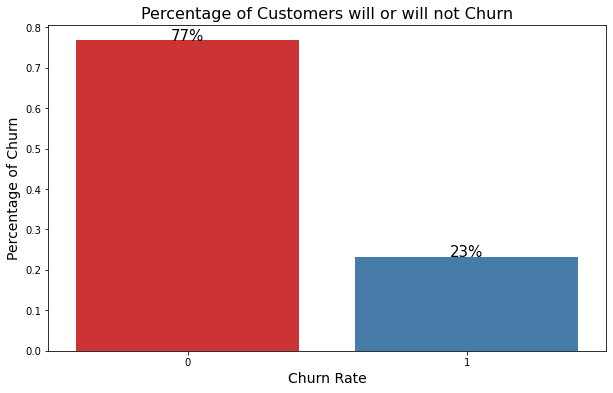

In [131]:
#Ploting barplot for target 

plt.figure(figsize=(10,6))
bar_graph = sns.barplot(telecom_imp['Churn'], telecom_imp['Churn'], palette='Set1', estimator=lambda x: len(x) / len(telecom_imp) )

#Anotating the graph
for i in bar_graph.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        bar_graph.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Churn Rate', fontsize=14)
plt.ylabel('Percentage of Churn', fontsize=14)
plt.title('Percentage of Customers will or will not Churn', fontsize=16)

In [132]:
# Putting feature variable to X
X = telecom_imp.drop(['Churn'], axis=1)

In [133]:
X.head()

arpu_6  onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_8  \
8   378.721       413.69         94.66              0.00              7.15   
16  430.975        50.51        296.29              0.00              0.00   
17  690.008      1185.91         61.64              0.00              0.00   
21  514.453       102.41        757.93              0.75              0.00   
33  977.020         0.00          0.00              0.00              0.56   

    loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  loc_ic_t2f_mou_6  \
8         378.09               0.0          0.00              0.00   
16        315.91               0.0          0.00              8.71   
17         97.54               0.0          2.58              0.00   
21         97.04               0.0          0.00              4.61   
33          0.00               0.0          0.00              1.73   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
8          81.43              0.00             22.43              0.00   
16        276.86             68.79             18.68              0.51   
17         81.96              8.63              1.28              0.00   
21        125.33             14.06             67.69              0.00   
33          3.48              0.00              2.95              0.23   

    spl_ic_mou_8  isd_ic_mou_6  ic_others_6  total_rech_num_6  max_rech_amt_6  \
8            0.0           0.0         0.00                19              90   
16           0.0           0.0         0.00                10             110   
17           0.0           0.0         0.00                19             110   
21           0.0           0.0         0.00                22              50   
33           0.0           0.0         1.23                 7             252   

    total_rech_data_6  max_rech_data_6  max_rech_data_8  vol_2g_mb_6  \
8                 1.0            154.0             23.0         0.00   
16                1.0            154.0             25.0         0.00   
17                1.0            154.0             25.0         0.00   
21                1.0            154.0             25.0         0.00   
33                5.0            252.0            455.0        87.05   

    monthly_2g_6   aon  cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
8              0   315                        0                        0   
16             0   511                        0                        0   
17             0   667                        0                        0   
21             0   720                        0                        1   
33             0  1328                        0                        0   

    cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_6_Medium  cat_loc_og_t2m_7_Medium  \
8                         1                        1                        1   
16                        0                        0                        0   
17                        0                        1                        0   
21                        1                        1                        1   
33                        0                        0                        0   

    cat_loc_og_t2m_8_Medium  cat_total_og_6_Medium  cat_total_og_7_Medium  \
8                         1                      0                      0   
16                        0                      0                      1   
17                        0                      0                      0   
21                        0                      0                      0   
33                        0                      0                      0   

    cat_total_og_8_Medium  cat_loc_ic_t2t_6_Medium  cat_loc_ic_t2t_7_Medium  \
8                       1                        1                        1   
16                      1                        0                        0   
17                      0                        1                        0   
21                      0  

In [134]:
# Putting response variable to y
y = telecom_imp['Churn']

In [135]:
y.head()

8     0
16    0
17    0
21    0
33    1
Name: Churn, dtype: int32

In [136]:
# # target variable distribution
100*(telecom_imp['Churn'].astype('int').value_counts()/len(telecom_imp.index))

0    76.791001
1    23.208999
Name: Churn, dtype: float64

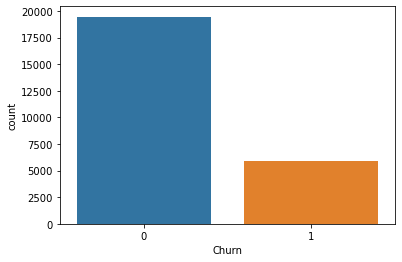

In [137]:
sns.countplot(y)

In [138]:
# To handle imbalanced data here we use SMOTE Analysis

from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

In [139]:
X_smote.head()

arpu_6  onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_8  \
0  378.721       413.69         94.66              0.00              7.15   
1  430.975        50.51        296.29              0.00              0.00   
2  690.008      1185.91         61.64              0.00              0.00   
3  514.453       102.41        757.93              0.75              0.00   
4  977.020         0.00          0.00              0.00              0.56   

   loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  loc_ic_t2f_mou_6  \
0        378.09               0.0          0.00              0.00   
1        315.91               0.0          0.00              8.71   
2         97.54               0.0          2.58              0.00   
3         97.04               0.0          0.00              4.61   
4          0.00               0.0          0.00              1.73   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0         81.43              0.00             22.43              0.00   
1        276.86             68.79             18.68              0.51   
2         81.96              8.63              1.28              0.00   
3        125.33             14.06             67.69              0.00   
4          3.48              0.00              2.95              0.23   

   spl_ic_mou_8  isd_ic_mou_6  ic_others_6  total_rech_num_6  max_rech_amt_6  \
0           0.0           0.0         0.00                19              90   
1           0.0           0.0         0.00                10             110   
2           0.0           0.0         0.00                19             110   
3           0.0           0.0         0.00                22              50   
4           0.0           0.0         1.23                 7             252   

   total_rech_data_6  max_rech_data_6  max_rech_data_8  vol_2g_mb_6  \
0                1.0            154.0             23.0         0.00   
1                1.0            154.0             25.0         0.00   
2                1.0            154.0             25.0         0.00   
3                1.0            154.0             25.0         0.00   
4                5.0            252.0            455.0        87.05   

   monthly_2g_6   aon  cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
0             0   315                        0                        0   
1             0   511                        0                        0   
2             0   667                        0                        0   
3             0   720                        0                        1   
4             0  1328                        0                        0   

   cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_6_Medium  cat_loc_og_t2m_7_Medium  \
0                        1                        1                        1   
1                        0                        0                        0   
2                        0                        1                        0   
3                        1                        1                        1   
4                        0                        0                        0   

   cat_loc_og_t2m_8_Medium  cat_total_og_6_Medium  cat_total_og_7_Medium  \
0                        1                      0                      0   
1                        0                      0                      1   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      0   

   cat_total_og_8_Medium  cat_loc_ic_t2t_6_Medium  cat_loc_ic_t2t_7_Medium  \
0                      1                        1                        1   
1                      1                        0                        0   
2                      0                        1                        0   
3                      0                        0                        1   


In [140]:
type(X_smote)

pandas.core.frame.DataFrame

In [141]:
y_smote.value_counts()

1    19455
0    19455
Name: Churn, dtype: int64

In [142]:
type(y_smote)

pandas.core.series.Series

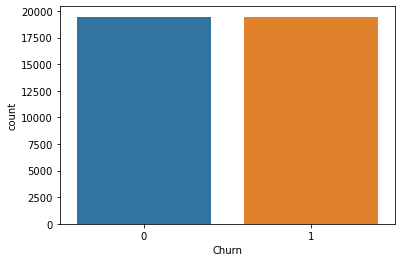

In [143]:
sns.countplot(y_smote)

## Step4: Train-Test Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=100)

### Step4a: Performing PCA analysis for Dimensionality Reduction

#### Scaling before PCA

In [146]:
X_p_train=X_train.copy()
X_p_test=X_test.copy()

In [147]:
X_p_train.shape

(27237, 46)

In [148]:
y_pca_train=y_train.copy()
y_pca_test=y_test.copy()

In [149]:
X_cov_matrix=X_p_train.cov()

In [150]:
eig_vals, eig_vecs= np.linalg.eig(X_cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\nEigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-9.89424715e-04  5.88259509e-01 -5.38411618e-02 ...  2.77143661e-05
   9.83942310e-06 -3.98317597e-07]
 [ 3.85148462e-02  3.20792923e-01  8.34957490e-01 ... -1.71011827e-05
  -1.29456162e-05  2.84997422e-05]
 [ 1.70850628e-02  5.59732913e-01 -5.22315091e-01 ... -2.10428074e-05
  -7.27651944e-06  3.83993597e-05]
 ...
 [ 1.04941434e-05  2.62187890e-08  2.94788365e-06 ...  4.81681035e-03
  -2.24954753e-03 -3.85690183e-03]
 [ 1.58303008e-04  3.50805412e-04  1.42020922e-04 ... -4.00386145e-04
  -1.68274892e-04  1.04006764e-03]
 [ 2.56502345e-04  4.38975594e-04  1.06352448e-05 ... -6.35265558e-05
   7.27004593e-05  9.45338546e-04]]

Eigen Values 
%s [9.94643334e+05 3.55670834e+05 1.83154071e+05 1.31130997e+05
 9.92089099e+04 7.01312733e+04 5.23016550e+04 2.01905173e+04
 9.82412998e+03 8.54151766e+03 4.87156808e+03 4.68093141e+03
 3.84175351e+03 3.25784289e+03 2.10902901e+03 3.57186825e+02
 3.11483953e+02 2.82330128e+02 1.24420498e+02 1.11150593e+02
 5.14417328e+01 4.54680

In [151]:
eig_pairs= [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x:x[0],reverse=True)

print('Eigen Values in Descending Order: ')
for i in eig_pairs:
    print(i[0])

Eigen Values in Descending Order: 
994643.3342636337
355670.83365499927
183154.0710852165
131130.99711652054
99208.90989013031
70131.27326220994
52301.65501596262
20190.51728844899
9824.129981261183
8541.517656556809
4871.568082212548
4680.931411515632
3841.7535117255075
3257.8428893429577
2109.029014926034
357.18682489702394
311.48395271565687
282.3301284560489
124.4204982198511
111.15059285330805
51.44173277847133
45.46802421149684
17.989823607067645
3.788472344128167
3.5996449440307225
0.6111429246479151
0.3130074464218112
0.2449849100341026
0.2201291061155619
0.19894877282250367
0.15617525667564114
0.1525112246957438
0.13828982699969822
0.12500026777607118
0.12299015823718383
0.11854608015151163
0.11437948604459472
0.10240534201554506
0.10160237763256136
0.09887563416458285
0.0858569742336719
0.08432754934654971
0.07767184288305454
0.07073627709178539
0.013711091746383616
0.009253060872819529


In [152]:
tot=sum(eig_vals)
var_exp =[(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Variance  captured  by each component is \n",var_exp)
print(40*'-')
print("Cumulative  variance  captured as we travel each component \n",cum_var_exp)

Variance  captured  by each component is 
 [51.14188288636166, 18.287636878746078, 9.41728932465533, 6.742402895878048, 5.101055097947141, 3.6059612931530634, 2.689210316348718, 1.038142050532487, 0.5051303192355023, 0.4391818460099743, 0.2504829175956814, 0.24068089314050778, 0.197532624415958, 0.16750951197224076, 0.10844059490444172, 0.018365585067695412, 0.016015666402227017, 0.014516655234491941, 0.006397367105800995, 0.00571506429152509, 0.0026449954296187766, 0.0023378434150168378, 0.0009249883052200696, 0.00019479305019930762, 0.00018508405356819962, 3.142332412282368e-05, 1.609400034768691e-05, 1.259646462836403e-05, 1.1318446097239536e-05, 1.0229410372117404e-05, 8.030111308759952e-06, 7.841716647123255e-06, 7.1104906584727745e-06, 6.427177295769479e-06, 6.323822874053435e-06, 6.095320341370647e-06, 5.881085287949508e-06, 5.265407033742486e-06, 5.224120766573286e-06, 5.08391895724457e-06, 4.414534506971318e-06, 4.335895596151495e-06, 3.993677085499062e-06, 3.637068961532357e-

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [154]:
X_p_sc_train = scaler.fit_transform(X_p_train)
X_p_sc_test = scaler.transform(X_p_test)

In [155]:
df_X_p_sc_train=pd.DataFrame(data=X_p_sc_train,columns=X_p_train.columns)
df_X_p_sc_test=pd.DataFrame(data=X_p_sc_test,columns=X_p_test.columns)

In [156]:
df_X_p_sc_train.describe()

arpu_6   onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  \
count  2.723700e+04  2.723700e+04  2.723700e+04      2.723700e+04   
mean   8.866254e-17  1.721361e-17 -1.114258e-16      3.596638e-16   
std    1.000018e+00  1.000018e+00  1.000018e+00      1.000018e+00   
min   -1.641761e+00 -6.288379e-01 -9.089374e-01     -3.890502e-01   
25%   -5.348222e-01 -5.312760e-01 -5.919705e-01     -3.890502e-01   
50%   -2.308003e-01 -3.658949e-01 -2.884276e-01     -3.220937e-01   
75%    2.720791e-01  8.019220e-02  2.214601e-01     -1.887624e-02   
max    6.251585e+01  1.567302e+01  1.787493e+01      3.196435e+01   

       loc_og_t2c_mou_8  loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  \
count      2.723700e+04  2.723700e+04      2.723700e+04  2.723700e+04   
mean       3.351824e-17  1.549623e-16     -1.814440e-16 -1.320757e-16   
std        1.000018e+00  1.000018e+00      1.000018e+00  1.000018e+00   
min       -2.803560e-01 -8.056030e-01     -1.868734e-01 -3.452355e-01   
25%       -2.803560e-01 -6.199941e-01     -1.868734e-01 -3.452355e-01   
50%       -2.803560e-01 -2.924715e-01     -1.868734e-01 -2.978104e-01   
75%       -1.767814e-01  2.447714e-01     -1.868734e-01  3.753569e-04   
max        5.493279e+01  1.503902e+01      3.027337e+01  6.031214e+01   

       loc_ic_t2f_mou_6  loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  \
count      2.723700e+04  2.723700e+04      2.723700e+04      2.723700e+04   
mean       1.642855e-16  4.719783e-17     -4.748418e-17      1.902547e-18   
std        1.000018e+00  1.000018e+00      1.000018e+00      1.000018e+00   
min       -3.685607e-01 -8.590376e-01     -2.159784e-01     -3.479528e-01   
25%       -3.643434e-01 -6.223733e-01     -2.159784e-01     -3.372594e-01   
50%       -2.856210e-01 -2.880797e-01     -1.955750e-01     -2.614841e-01   
75%       -2.234284e-02  2.621365e-01     -6.966059e-02     -3.839501e-02   
max        3.333768e+01  1.401839e+01      7.454511e+01      4.969826e+01   

       std_ic_t2f_mou_6  spl_ic_mou_8  isd_ic_mou_6   ic_others_6  \
count      2.723700e+04  2.723700e+04  2.723700e+04  2.723700e+04   
mean       4.873499e-16  1.497923e-15  3.107923e-15  4.843239e-16   
std        1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00   
min       -1.771550e-01 -2.564623e-01 -1.672306e-01 -1.060266e-01   
25%       -1.771550e-01 -2.564623e-01 -1.672306e-01 -1.060266e-01   
50%       -1.771550e-01 -2.564623e-01 -1.672306e-01 -1.060266e-01   
75%       -1.286159e-01 -2.564623e-01 -1.580081e-01 -8.861428e-02   
max        6.021349e+01  1.220159e+01  5.738196e+01  1.045014e+02   

       total_rech_num_6  max_rech_amt_6  total_rech_data_6  max_rech_data_6  \
count      2.723700e+04    2.723700e+04       2.723700e+04     2.723700e+04   
mean      -3.198872e-16   -1.311789e-16       5.980233e-17    -8.467147e-16   
std        1.000018e+00    1.000018e+00       1.000018e+00     1.000018e+00   
min       -1.224121e+00   -1.193970e+00      -3.639979e-01    -1.990799e+00   
25%       -6.519471e-01   -4.837744e-01      -3.639979e-01    -7.282309e-02   
50%       -3.086426e-01   -2.642595e-01      -3.639979e-01    -7.282309e-02   
75%        2.635316e-01    3.749163e-01       8.151095e-02    -7.282309e-02   
max        3.379294e+01    2.010543e+01       2.733960e+01     1.748982e+01   

       max_rech_data_8   vol_2g_mb_6  monthly_2g_6           aon  \
count     2.723700e+04  2.723700e+04  2.723700e+04  2.723700e+04   
mean      9.152624e-16  6.561044e-16 -1.246489e-15 -1.158240e-17   
std       1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00   
min      -9.526995e-01 -3.497870e-01 -3.665989e-01 -1.162087e+00   
25%      -7.314666e-01 -3.497870e-01 -3.665989e-01 -8.508505e-01   
50%      -6.927320e-01 -3.430836e-01 -3.665989e-01 -3.270868e-01   
75%       5.916880e-01 -1.521884e-01 -3.665989e-01  7.738242e-01   
max       1.337213e+01  3.756253e+01  1.010540e+01  3.008885e+00   

       cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
count             2.723700e+04   

In [157]:
from sklearn.decomposition import PCA

pca = PCA()
df_X_pca_train = pca.fit_transform(df_X_p_sc_train)
df_X_pca_test = pca.transform(df_X_p_sc_test)

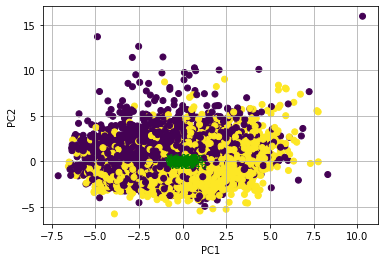

In [158]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_pca_test) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(df_X_pca_test[:,0:47], pca.components_) 
plt.show()

In [159]:
explained_variance_all = pca.explained_variance_ratio_
print(explained_variance_all)

[0.10981416 0.06145646 0.04551012 0.04007093 0.03765037 0.03531816
 0.03239788 0.03207289 0.02655459 0.0265051  0.02541669 0.02418261
 0.02358572 0.0225574  0.02243024 0.02199318 0.02126945 0.01990915
 0.01924312 0.01843913 0.01841817 0.01806659 0.01779299 0.01752056
 0.01635926 0.01601493 0.01579259 0.01546102 0.01417303 0.01397037
 0.01384967 0.01359036 0.01314828 0.01264777 0.01258828 0.01215986
 0.01187512 0.01106214 0.01072241 0.01042269 0.01014182 0.00893264
 0.00813935 0.00798113 0.00726335 0.00552826]


<BarContainer object of 46 artists>

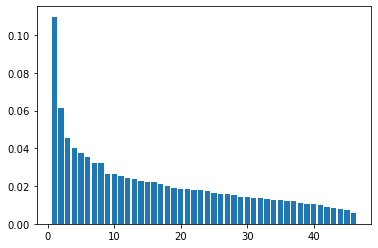

In [160]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [161]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

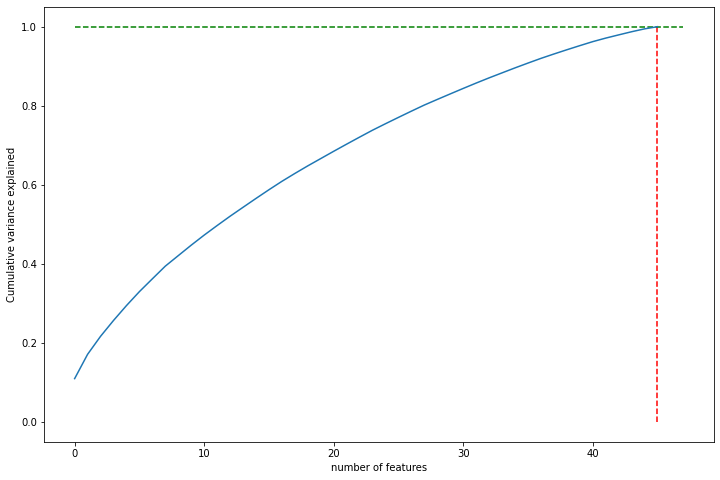

In [162]:
#making the scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1.0, xmax=47, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("number of features")
plt.show()

In [163]:
# Let us take components which can describe almost 95% variance
pca8 = PCA(n_components=8, random_state=42)
X_pca_train = pca8.fit_transform(X_p_sc_train)
X_pca_test = pca8.transform(X_p_sc_test)

In [164]:
print(pd.DataFrame(pca8.components_,columns=X_p_train.columns,
                   index = ['PC-1','PC-2','PC-3','PC-4','PC-5',
                            'PC-6','PC-7','PC-8']))

        arpu_6  onnet_mou_6  offnet_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_8  \
PC-1  0.141913     0.003997      0.086466          0.133690         -0.009762   
PC-2  0.255337     0.311495      0.322499         -0.032719          0.111744   
PC-3  0.364530     0.087060      0.198237          0.229571         -0.059166   
PC-4  0.152561    -0.127138      0.086081          0.087170          0.221547   
PC-5  0.061850     0.045214     -0.133210         -0.117041          0.221810   
PC-6  0.084711    -0.008440     -0.029504         -0.248932          0.003171   
PC-7 -0.216069    -0.101048     -0.047701          0.061827          0.428717   
PC-8 -0.065052     0.035442     -0.046154          0.093328         -0.013763   

      loc_og_mou_6  std_og_t2f_mou_6  spl_og_mou_6  loc_ic_t2f_mou_6  \
PC-1      0.222197          0.032672     -0.003561          0.127299   
PC-2      0.197323         -0.019650      0.198575         -0.042079   
PC-3      0.161345          0.158965     -0.001644    

In [165]:
X_pca_train.shape

(27237, 8)

In [166]:
explained_variance_8 = pca8.explained_variance_ratio_
print(explained_variance_8)

[0.10981414 0.06145567 0.04548782 0.04003405 0.03763154 0.03522627
 0.03227266 0.03190455]


<BarContainer object of 8 artists>

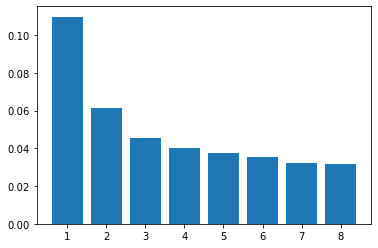

In [167]:
plt.bar(range(1,len(explained_variance_8)+1), explained_variance_8)

In [168]:
var_cumu = np.cumsum(explained_variance_8)

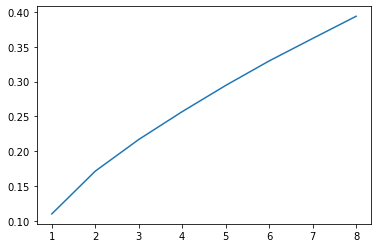

In [169]:
#making the scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### Step5a: Classification Model to predict

#### Model 1: Random Classifier Model

In [170]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_pca_train, y_pca_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [171]:
X_pca_train.shape

(27237, 8)

#### Evaluation

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [173]:
# Predicting the Test set results
y_pca_pred_test = classifier.predict(X_pca_test)

In [174]:
c_m_test = confusion_matrix(y_pca_test, y_pca_pred_test)
print(c_m_test)

[[4150 1649]
 [1634 4240]]


In [175]:
rcm_acc_test= accuracy_score(y_pca_test, y_pca_pred_test)
print('Accuracy: ',rcm_acc_test)

Accuracy:  0.7187526771181358


In [176]:
# roc auc
roc_auc_RFC_test=metrics.roc_auc_score(y_pca_test, y_pca_pred_test)
print("ROC AUC Random Forest Classifier ",roc_auc_RFC_test)

ROC AUC Random Forest Classifier  0.7187328095911715


In [177]:
results = pd.DataFrame({'Model':['Random Classifier for Test'],'Accuracy': [rcm_acc_test], 'ROC-AUC':[roc_auc_RFC_test]})
results = results[['Model', 'Accuracy', 'ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0  Random Classifier for Test  0.718753  0.718733

#### Model 2: Decision Tree Classifier Model

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_pca_train, y_pca_train)

DecisionTreeClassifier(max_depth=3)

In [180]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

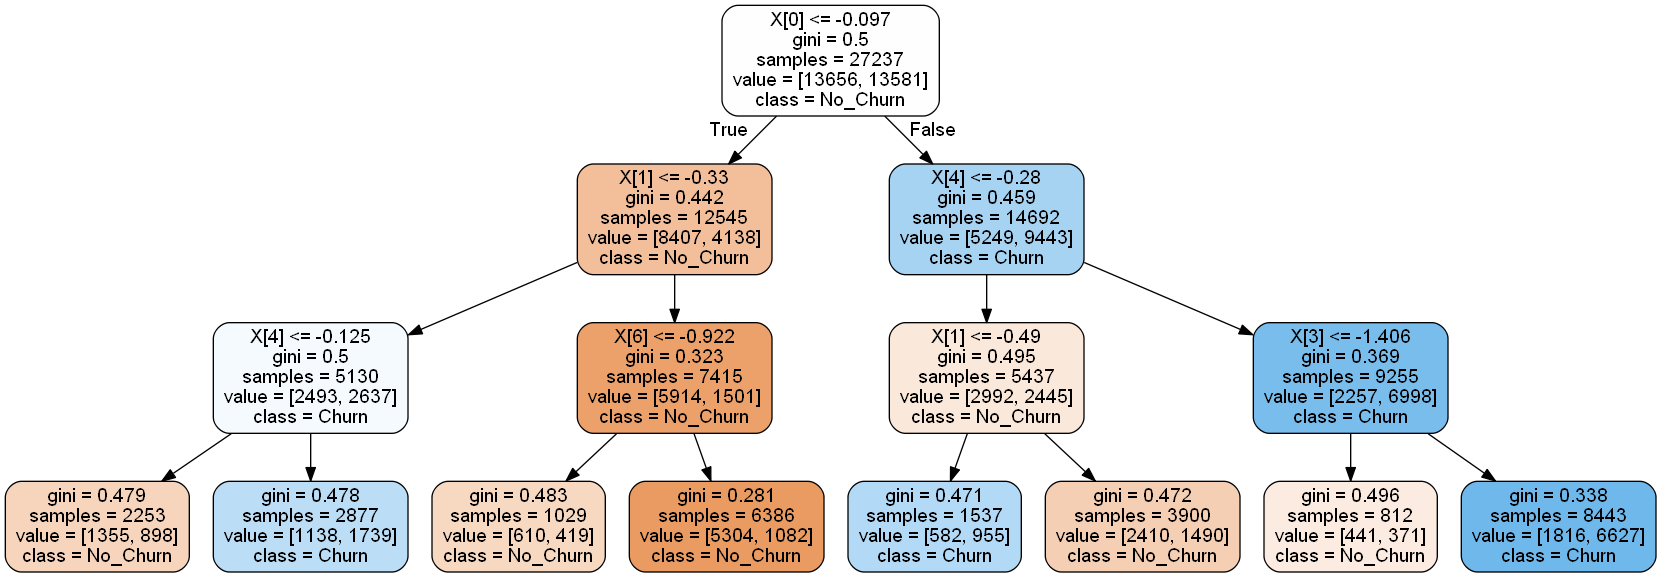

In [181]:
#plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=None, 
                class_names=['No_Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [182]:
#y_pca_pred_dt = dt.predict(X_pca_test).astype(int)
acc_decision_tree = dt.score(X_pca_train,y_pca_train) 
print('Accuracy of decision tree: ', acc_decision_tree)

Accuracy of decision tree:  0.7137717076036274


#### Evaluating model performance

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [184]:
y_pca_test_pred=dt.predict(X_pca_test)

In [185]:
acc_dtc_test=accuracy_score(y_pca_test, y_pca_test_pred)
print('Accuracy of decision tree: ',acc_dtc_test)

Accuracy of decision tree:  0.7072731945515291


In [186]:
c_dtc_m_test=confusion_matrix(y_pca_test, y_pca_test_pred)
print(c_dtc_m_test)

[[4276 1523]
 [1894 3980]]


In [187]:
# roc auc
roc_auc_DTC_test=metrics.roc_auc_score(y_pca_test, y_pca_test_pred)
print("ROC AUC Decision Tree Classifier ",roc_auc_DTC_test)

ROC AUC Decision Tree Classifier  0.7074653250243383


Creating helper functions to evaluate model performance and help plot the decision tree

In [188]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=None,
                    class_names=['Churn', "No_Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [189]:
def evaluate_model(dt_classifier):
    print("Test Accuracy :", accuracy_score(y_pca_test, dt_classifier.predict(X_pca_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_pca_test, dt_classifier.predict(X_pca_test)))

##### Without setting any hyper-parameters

In [190]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_pca_train, y_pca_train)

DecisionTreeClassifier(random_state=42)

In [191]:
evaluate_model(dt_default)

Test Accuracy : 0.7208943716268311
Test Confusion Matrix:
[[4125 1674]
 [1584 4290]]


#### Controlling the depth of the tree

In [192]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_pca_train, y_pca_train)

DecisionTreeClassifier(max_depth=3)

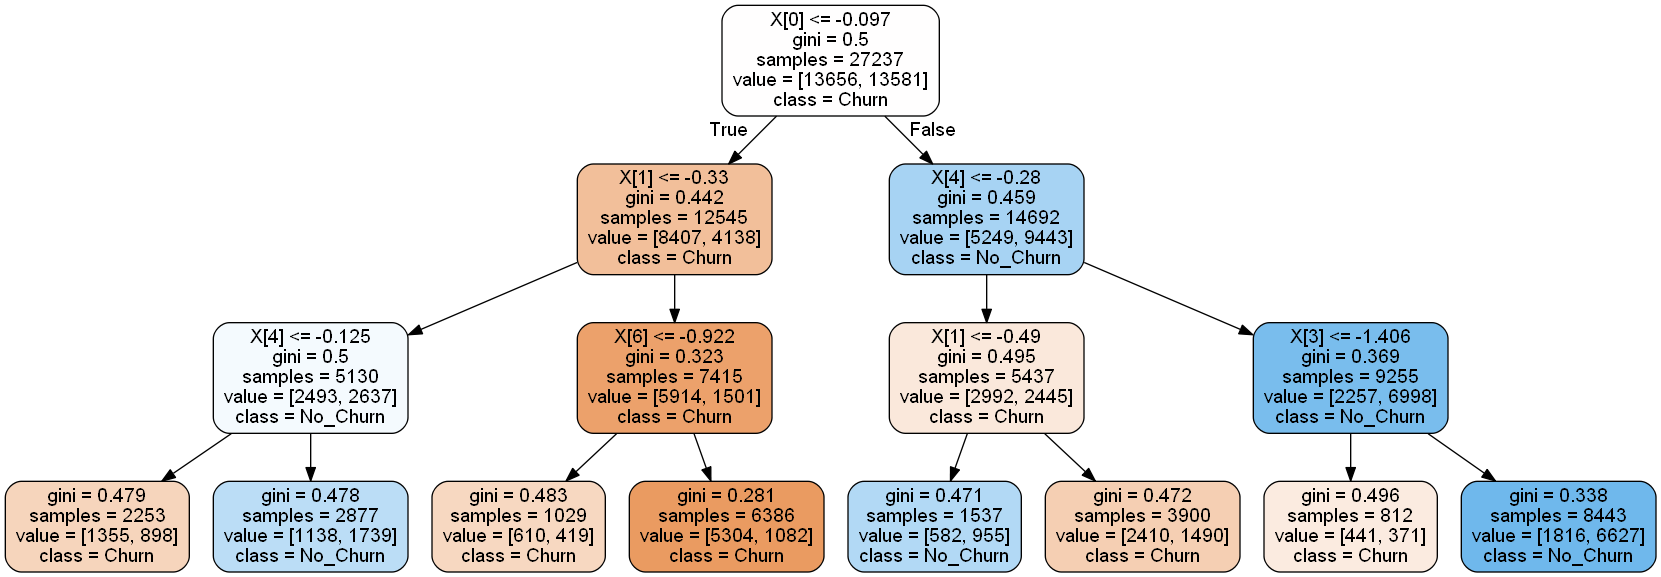

In [193]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [194]:
evaluate_model(dt_depth)

Test Accuracy : 0.7072731945515291
Test Confusion Matrix:
[[4276 1523]
 [1894 3980]]


#### Hyper parameter Tuning

In [195]:
dt = DecisionTreeClassifier(random_state=42)

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [198]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=3, verbose=1, scoring = "accuracy")

In [199]:
X_pca_train.shape

(27237, 8)

In [200]:
%%time
grid_search.fit(X_pca_train, y_pca_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 30.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [201]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.062582      0.006403         0.001496        0.000498   
1       0.059019      0.002529         0.001753        0.000436   
2       0.059835      0.004774         0.001745        0.000431   
3       0.059464      0.002321         0.001746        0.000432   
4       0.056694      0.002264         0.001873        0.000547   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.68047   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.68047   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.68047   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.68047   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.68047   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.671317           0.682038           0.674255          0.67702   
1           0.671317           0.682038           0.674255          0.67702   
2           0.671317           0.682038           0.674255          0.67702   
3           0.671317           0.682038           0.674255          0.67702   
4           0.671317           0.682038           0.674255          0.67702   

   std_test_score  rank_test_score  
0        0.004395               41  
1        0.004395               41  
2        0.004395               41  
3        0.004395               41  
4        0.004395               41

In [202]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22       0.244949      0.006010         0.002747        0.000422   
17       0.199889      0.004042         0.001995        0.000000   
47       0.375294      0.011888         0.002499        0.000504   
15       0.212600      0.006259         0.001760        0.000406   
48       0.329950      0.007722         0.002249        0.000431   

   param_criterion param_max_depth param_min_samples_leaf  \
22            gini              20                     20   
17            gini              10                     20   
47         entropy              20                     20   
15            gini              10                      5   
48         entropy              20                     50   

                                               params  split0_test_score  \
22  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.760206   
17  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.760646   
47  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.760499   
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.755947   
48  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.756828   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
22           0.756058           0.760023           0.751799         0.757022   
17           0.755030           0.756058           0.753121         0.756214   
47           0.753561           0.752533           0.751799         0.754598   
15           0.748421           0.756499           0.751652         0.753130   
48           0.756939           0.754590           0.742987         0.752836   

    std_test_score  rank_test_score  
22        0.003441                1  
17        0.002768                2  
47        0.003464                3  
15        0.003303                4  
48        0.005763                5

In [203]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

In [204]:
dt_best = grid_search.best_estimator_

In [205]:
evaluate_model(dt_best)

Test Accuracy : 0.750878094748565
Test Confusion Matrix:
[[4359 1440]
 [1468 4406]]


In [206]:
from sklearn.metrics import classification_report

In [207]:
print(classification_report(y_pca_test, dt_best.predict(X_pca_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5799
           1       0.75      0.75      0.75      5874

    accuracy                           0.75     11673
   macro avg       0.75      0.75      0.75     11673
weighted avg       0.75      0.75      0.75     11673



In [208]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.500229 to fit



In [209]:
DTC=DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [210]:
DTC.fit(X_pca_train,y_pca_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [211]:
# Predicting on Test

In [212]:
y_pca_pred_DTC_test = DTC.predict(X_pca_test).astype(int)

In [213]:
acc_dtc_test=accuracy_score(y_pca_test, y_pca_pred_DTC_test)
print('Accuracy of decision tree for Test: ',acc_dtc_test )

Accuracy of decision tree for Test:  0.733658870898655


In [214]:
# roc auc
roc_auc_DTC_test=metrics.roc_auc_score(y_pca_test, y_pca_pred_DTC_test)
print("ROC AUC Random Forest Classifier for Test",roc_auc_DTC_test)

ROC AUC Random Forest Classifier for Test 0.7334733842490896


In [215]:
tempResults = pd.DataFrame({'Model':['Decision Tree classifier for Test'], 
                            'Accuracy': [acc_dtc_test], 'ROC-AUC':[roc_auc_DTC_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473

### Step 5b: Logistic Regression Model through PCA

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
logreg_pca=LogisticRegression(solver='lbfgs')

In [218]:
logreg_pca.fit(X_pca_train,y_pca_train)

LogisticRegression()

In [219]:
y_pca_test_pred = logreg_pca.predict(X_pca_test)

In [220]:
# Predicting on Test data

In [221]:
logreg_pca.predict(X_pca_test)

array([1, 0, 0, ..., 1, 0, 0])

In [222]:
lor_pca_acc_test=logreg_pca.score(X_pca_test, y_pca_test)
print("Accuracy of logistic Regression(PCA)for Test: ",lor_pca_acc_test)

Accuracy of logistic Regression(PCA)for Test:  0.7766640966332562


In [223]:
c_logregpca_m_test=confusion_matrix(y_pca_test, y_pca_test_pred)
print(c_logregpca_m_test)

[[4637 1162]
 [1445 4429]]


In [224]:
# roc auc
roc_auc_logreg_test=metrics.roc_auc_score(y_pca_test, y_pca_test_pred)
print("ROC AUC under logreg(PCA) for Test",roc_auc_logreg_test)

ROC AUC under logreg(PCA) for Test 0.7768106526062664


In [225]:
tempResults = pd.DataFrame({'Model':['Logistic regression(PCA) for Test'], 
                            'Accuracy': [lor_pca_acc_test], 'ROC-AUC':[roc_auc_logreg_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811

### Adaboost

In [226]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [227]:
# fit
adaboost_model_1.fit(X_pca_train, y_pca_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=600)

In [228]:
# predictions
# the second column represents the probability of a churning
predictions = adaboost_model_1.predict(X_pca_test)
predictions[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [229]:
# metrics: AUC
metrics.roc_auc_score(y_pca_test, predictions)

0.7760860022887959

#### Adaboost-Hyperparameter Tuning

In [230]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2,5],
              "n_estimators": [200,400,600]
             }

In [231]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [232]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               n_jobs=8,
                               return_train_score=True,                         
                               verbose = 1)

Note: The step below for grid_search takes approximately 15-20 mins to execute based on machine's processing speed

In [233]:
# fit 
grid_search_ABC.fit(X_pca_train, y_pca_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             n_jobs=8,
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [234]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      26.112758      0.080577         0.412718        0.018468   
1      53.894492      0.060952         0.731847        0.011650   
2      82.126114      1.137688         1.103057        0.133036   
3      65.301206      0.860631         0.384433        0.030636   
4     110.096961      6.718846         0.515020        0.104265   
5     123.641787      2.030586         0.387112        0.044064   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                200   
1                               2                400   
2                               2                600   
3                               5                200   
4                               5                400   
5                               5                600   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.839400   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.844320   
2  {'base_estimator__max_depth': 2, 'n_estimators...           0.847744   
3  {'base_estimator__max_depth': 5, 'n_estimators...           0.852695   
4  {'base_estimator__max_depth': 5, 'n_estimators...           0.853280   
5  {'base_estimator__max_depth': 5, 'n_estimators...           0.854678   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.841009           0.834677         0.838362        0.002687   
1           0.843560           0.836406         0.841429        0.003565   
2           0.847405           0.836642         0.843930        0.005156   
3           0.854004           0.849466         0.852055        0.001907   
4           0.854300           0.849702         0.852427        0.001971   
5           0.855171           0.853291         0.854380        0.000796   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.849248            0.845219   
1                5            0.856400            0.848489   
2                4            0.861451            0.853962   
3                3            0.890229            0.889215   
4                2            0.894111            0.891125   
5                1            0.899068            0.895714   

   split2_train_score  mean_train_score  std_train_score  
0            0.849480          0.847982         0.001957  
1            0.852047          0.852312         0.003235  
2            0.852624          0.856012         0.003884  
3            0.881619          0.887021         0.003842  
4            0.883207          0.889481         0.004601  
5            0.892256          0.895679         0.002781

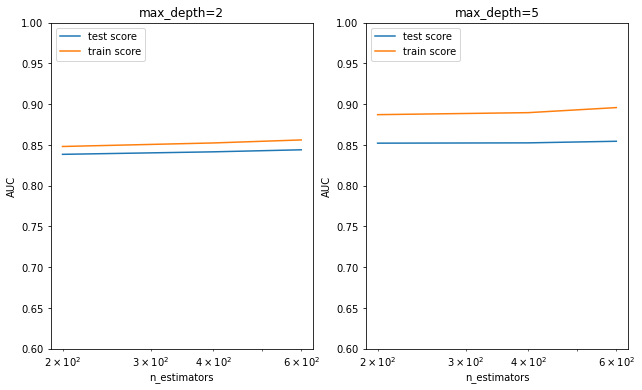

In [235]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results above show that:
The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
At max_depth=2, the model performs slightly better with a higher test score
Thus, we should go ahead with max_depth=2 and n_estimators=600.
Note that we haven't experimented with many other important hyperparameters till now, such as learning rate, subsample etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.

In [236]:
grid_search_ABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.6, n_estimators=600)

In [237]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = grid_search_ABC.best_estimator_

ABC.fit(X_pca_train, y_pca_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.6, n_estimators=600)

In [238]:
# predict on test data
ABC_predictions_test = ABC.predict(X_pca_test)
ABC_predictions_test[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [239]:
ABC_pca_acc_tes=ABC.score(X_pca_test, y_pca_test)
print("Accuracy of Adaboost(PCA)for Test: ",ABC_pca_acc_tes)

Accuracy of Adaboost(PCA)for Test:  0.7738370598817784


In [240]:
# roc auc
roc_auc_ABC_test=metrics.roc_auc_score(y_pca_test, ABC_predictions_test)
print("ROC AUC under Adaboost for Test",roc_auc_ABC_test)

ROC AUC under Adaboost for Test 0.7739091890204732


In [241]:
tempResults = pd.DataFrame({'Model':['Adaboost(PCA) for Test'], 'Accuracy': [ABC_pca_acc_tes],
                            'ROC-AUC':[roc_auc_ABC_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy','ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811
0             Adaboost(PCA) for Test  0.773837  0.773909

### Gradient Boosting Classifier

In [242]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [243]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [244]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               n_jobs=8,
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_pca_train, y_pca_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             n_jobs=8,
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [245]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.962491      0.053083         0.094779        0.018778   
1      23.799017      0.060537         0.069147        0.005579   
2      29.446319      0.854237         0.070203        0.004162   
3      11.877027      1.318705         0.051572        0.017465   
4      20.221497      0.143583         0.054244        0.017206   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.854863   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.857924   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.857537   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.836622   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.843999   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.859950           0.853582         0.856131        0.002750   
1           0.861231           0.856225         0.858460        0.002078   
2           0.862140           0.855446         0.858375        0.002796   
3           0.839801           0.829634         0.835352        0.004247   
4           0.847299           0.842749         0.844682        0.001919   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.877883            0.875740   
1                1            0.880053            0.879577   
2                2            0.880490            0.878845   
3                7            0.873411            0.860874   
4                5            0.894707            0.892599   

   split2_train_score  mean_train_score  std_train_score  
0            0.877445          0.877023         0.000924  
1            0.879675          0.879769         0.000205  
2            0.880224          0.879853         0.000721  
3            0.867139          0.867141         0.005118  
4            0.894169          0.893825         0.000894

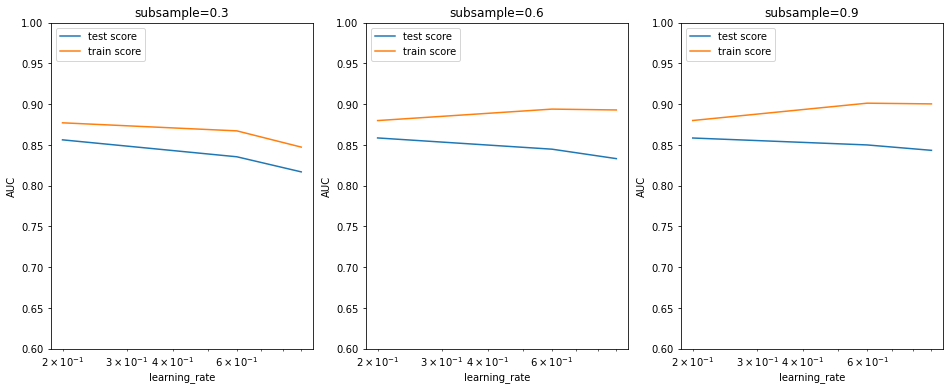

In [246]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

It is clear from the plot above that the model with a lower subsample ratio performs better, while those with higher subsamples tend to overfit.
Also, a lower learning rate results in less overfitting.

In [247]:
grid_search_GBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=200,
                           subsample=0.6)

In [248]:
GBC=grid_search_GBC.best_estimator_

In [249]:
GBC.fit(X_pca_train,y_pca_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=200,
                           subsample=0.6)

In [250]:
# predict on test data
GBC_predictions_test = GBC.predict(X_pca_test)
GBC_predictions_test[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [251]:
GBC_pca_acc_tes=GBC.score(X_pca_test, y_pca_test)
print("Accuracy of GradientBoost(PCA)for Test: ",GBC_pca_acc_tes)

Accuracy of GradientBoost(PCA)for Test:  0.7845455324252548


In [252]:
# roc auc
roc_auc_GBC_test=metrics.roc_auc_score(y_pca_test, GBC_predictions_test)
print("ROC AUC under GradientBoost for Test",roc_auc_GBC_test)

ROC AUC under GradientBoost for Test 0.7846274612173808


In [253]:
tempResults = pd.DataFrame({'Model':['GradientBoost(PCA) for Test'],  
                            'Accuracy': [GBC_pca_acc_tes], 'ROC-AUC':[roc_auc_GBC_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy','ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811
0             Adaboost(PCA) for Test  0.773837  0.773909
0        GradientBoost(PCA) for Test  0.784546  0.784627

### XGBoosting Classifier

In [254]:
# fit model on training data with default hyperparameters
XGBmodel =xgb.XGBClassifier()
XGBmodel.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [255]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_xgb_pred = XGBmodel.predict(X_pca_test)
y_xgb_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [256]:
# evaluate predictions
roc = metrics.roc_auc_score(y_pca_test, y_xgb_pred)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 78.87%


In [257]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"base_estimator__max_depth" : [2, 5],
              'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model_exp = xgb.XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgbmodel_cv = GridSearchCV(estimator = xgb_model_exp, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=8,
                        verbose = 1,
                        return_train_score=True)      


In [258]:
# fit the model
xgbmodel_cv.fit(X_pca_train, y_pca_train)       

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[20:50:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator__max_depth" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                      

In [259]:
# cv results
cv_results = pd.DataFrame(xgbmodel_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.943700      0.149195         0.098477        0.036486   
1        6.996069      0.016266         0.063199        0.001888   
2        8.491160      0.173507         0.061352        0.000727   
3        5.290186      0.031561         0.062368        0.000704   
4        7.590593      0.100090         0.063889        0.003811   
5        8.902819      0.058852         0.060373        0.002557   
6        5.303434      0.066369         0.058261        0.005537   
7        7.622073      0.118003         0.067694        0.006460   
8        9.505636      0.148529         0.072678        0.006913   
9        5.778612      0.124089         0.069431        0.006031   
10       7.140258      0.395874         0.041097        0.008389   
11       6.158757      0.808473         0.020633        0.002474   

   param_base_estimator__max_depth param_learning_rate param_subsample  \
0                                2                 0.2             0.3   
1                                2                 0.2             0.6   
2                                2                 0.2             0.9   
3                                2                 0.6             0.3   
4                                2                 0.6             0.6   
5                                2                 0.6             0.9   
6                                5                 0.2             0.3   
7                                5                 0.2             0.6   
8                                5                 0.2             0.9   
9                                5                 0.6             0.3   
10                               5                 0.6             0.6   
11                               5                 0.6             0.9   

                                               params  split0_test_score  \
0   {'base_estimator__max_depth': 2, 'learning_rat...           0.859642   
1   {'base_estimator__max_depth': 2, 'learning_rat...           0.859591   
2   {'base_estimator__max_depth': 2, 'learning_rat...           0.857641   
3   {'base_estimator__max_depth': 2, 'learning_rat...           0.843450   
4   {'base_estimator__max_depth': 2, 'learning_rat...           0.852893   
5   {'base_estimator__max_depth': 2, 'learning_rat...           0.852524   
6   {'base_estimator__max_depth': 5, 'learning_rat...           0.859642   
7   {'base_estimator__max_depth': 5, 'learning_rat...           0.859591   
8   {'base_estimator__max_depth': 5, 'learning_rat...           0.857641   
9   {'base_estimator__max_depth': 5, 'learning_rat...           0.843450   
10  {'base_estimator__max_depth': 5, 'learning_rat...           0.852893   
11  {'base_estimator__max_depth': 5, 'learning_rat...           0.852524   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.862328           0.857297         0.859756        0.002055   
1            0.862209           0.857995         0.859932        0.001737   
2            0.862803           0.856727         0.859057        0.002675   
3            0.844665           0.846069         0.844728        0.001070   
4            0.854388           0.850261         0.852514        0.001706   
5            0.857131           0.853304         0.854320        0.002013   
6            0.862328           0.857297         0.859756        0.002055   
7            0.862209           0.857995         0.859932        0.001737   
8            0.862803           0.856727         0.859057        0.002675   
9            0.844665           0.846069         0.844728        0.001070   
10           0.854388           0.850261         0.852514        0.001706   
11           0.857131           0.853304         0.854320        0.002013   

    rank_test_score  split0_train_score  split1_train_score  \
0                 3            0.877257            0.876445   
1                 1            0.879105

In [260]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_max_depth'] = cv_results['param_base_estimator__max_depth'].astype('float')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.943700      0.149195         0.098477        0.036486   
1       6.996069      0.016266         0.063199        0.001888   
2       8.491160      0.173507         0.061352        0.000727   
3       5.290186      0.031561         0.062368        0.000704   
4       7.590593      0.100090         0.063889        0.003811   

  param_base_estimator__max_depth  param_learning_rate param_subsample  \
0                               2                  0.2             0.3   
1                               2                  0.2             0.6   
2                               2                  0.2             0.9   
3                               2                  0.6             0.3   
4                               2                  0.6             0.6   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'learning_rat...           0.859642   
1  {'base_estimator__max_depth': 2, 'learning_rat...           0.859591   
2  {'base_estimator__max_depth': 2, 'learning_rat...           0.857641   
3  {'base_estimator__max_depth': 2, 'learning_rat...           0.843450   
4  {'base_estimator__max_depth': 2, 'learning_rat...           0.852893   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.862328           0.857297         0.859756        0.002055   
1           0.862209           0.857995         0.859932        0.001737   
2           0.862803           0.856727         0.859057        0.002675   
3           0.844665           0.846069         0.844728        0.001070   
4           0.854388           0.850261         0.852514        0.001706   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.877257            0.876445   
1                1            0.879105            0.877381   
2                5            0.877922            0.878311   
3               11            0.882176            0.881203   
4                9            0.891409            0.891092   

   split2_train_score  mean_train_score  std_train_score  param_max_depth  
0            0.876810          0.876837         0.000332              2.0  
1            0.879098          0.878528         0.000811              2.0  
2            0.877949          0.878061         0.000177              2.0  
3            0.881232          0.881537         0.000452              2.0  
4            0.892774          0.891758         0.000730              2.0

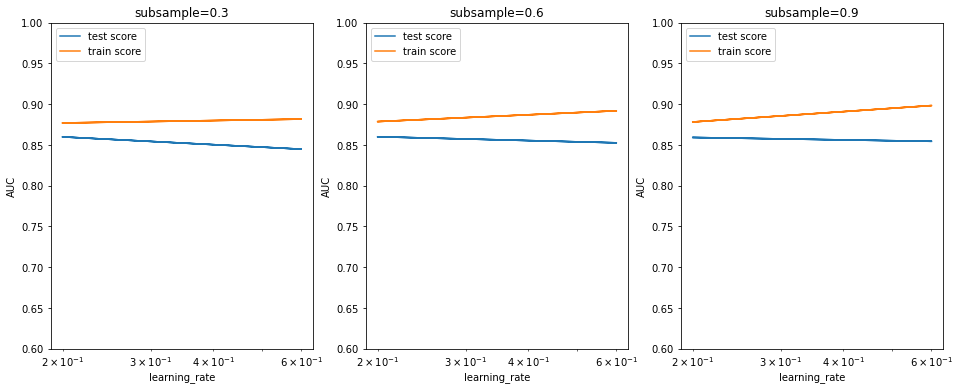

In [261]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [262]:
xgbmodel_cv.best_estimator_

XGBClassifier(base_estimator__max_depth=2, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [263]:
# # chosen best hyperparameters from the above xgbmodel_cv model
# # 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
# params = {'learning_rate': 0.2,
#           'max_depth': 2, 
#           'n_estimators':200,
#            'n_jobs':4,
#           'subsample':0.3,
#          'objective':'binary:logistic'}

In [264]:
# fit model on training data
xgb_model = xgbmodel_cv.best_estimator_
xgb_model.fit(X_pca_train, y_pca_train)

[20:50:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator__max_depth" } are not used.



XGBClassifier(base_estimator__max_depth=2, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

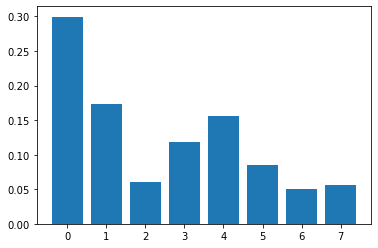

In [265]:
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

#### Predictions on Test Data

In [266]:
# predict
XGB_predictions_test = xgb_model.predict(X_pca_test)
XGB_predictions_test[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [267]:
XGB_pca_acc_test=xgb_model.score(X_pca_test, y_pca_test)
print("Accuracy of XGBoost(PCA)for Test: ",XGB_pca_acc_test)

Accuracy of XGBoost(PCA)for Test:  0.7861732202518633


In [268]:
# roc_auc
xgb_auc_test = metrics.roc_auc_score(y_pca_test,XGB_predictions_test)
xgb_auc_test

0.7862370515433519

In [269]:
tempResults = pd.DataFrame({'Model':['XGBoost(PCA) for Test'],  
                            'Accuracy': [XGB_pca_acc_test], 'ROC-AUC':[xgb_auc_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy','ROC-AUC']]
results


Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811
0             Adaboost(PCA) for Test  0.773837  0.773909
0        GradientBoost(PCA) for Test  0.784546  0.784627
0              XGBoost(PCA) for Test  0.786173  0.786237

### Feature Selection through RFE Method

### Feature Scaling

In [270]:
from sklearn.preprocessing import StandardScaler

In [271]:
X_log_train=X_train.copy()
X_log_test=X_test.copy()

In [272]:
# X_train_s=X_train.copy()
# X_test_s=X_test.copy()

In [273]:
col=X_train.columns.tolist()
col

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'std_og_t2f_mou_6',
 'spl_og_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'max_rech_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'max_rech_data_8',
 'vol_2g_mb_6',
 'monthly_2g_6',
 'aon',
 'cat_loc_og_t2t_6_Medium',
 'cat_loc_og_t2t_7_Medium',
 'cat_loc_og_t2t_8_Medium',
 'cat_loc_og_t2m_6_Medium',
 'cat_loc_og_t2m_7_Medium',
 'cat_loc_og_t2m_8_Medium',
 'cat_total_og_6_Medium',
 'cat_total_og_7_Medium',
 'cat_total_og_8_Medium',
 'cat_loc_ic_t2t_6_Medium',
 'cat_loc_ic_t2t_7_Medium',
 'cat_loc_ic_t2t_8_Medium',
 'cat_loc_ic_t2m_6_Medium',
 'cat_loc_ic_t2m_7_Medium',
 'cat_loc_ic_t2m_8_Medium',
 'cat_total_ic_6_Medium',
 'cat_total_ic_7_Medium',
 'cat_total_ic_8_Medium',
 'roam_ic_mou_6_7_months',
 'spl_ic_mou_6_7_months',
 'og_others_6_7_mont

In [274]:
y_log_train = y_train.copy()
y_log_test = y_test.copy()

In [275]:
### Checking the Churn Rate
churn = (sum(y_smote)/len(y_smote.index))*100
print("Churn Rate: ",churn)

Churn Rate:  50.0


We have almost 50% churn rate after SMOTE ANALYSIS

### 6.a Feature Selection Using RFE

#### K-Fold technique to deal with class imbalance

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [277]:
# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2,48))}]

# specify model

logreg.fit(X_log_train, y_log_train)
rfe = RFE(logreg)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        n_jobs=5,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_log_train, y_log_train)                  

Fitting 3 folds for each of 46 candidates, totalling 138 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()), n_jobs=5,
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [278]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       23.556479      0.806967         0.036448        0.012490   
1       25.047483      2.190381         0.017341        0.004477   
2       27.826753      0.537229         0.020737        0.007175   
3       25.788212      0.809996         0.019839        0.008780   
4       24.820852      0.311748         0.015033        0.002445   
5       25.456120      0.625160         0.012981        0.002162   
6       26.120841      0.648813         0.018616        0.006323   
7       27.255758      0.465268         0.022306        0.005412   
8       26.158113      0.453789         0.016956        0.004097   
9       25.668917      0.339293         0.023734        0.004778   
10      25.396299      0.487918         0.034325        0.017593   
11      25.293990      0.501820         0.015954        0.002824   
12      24.819629      0.395774         0.022504        0.004810   
13      24.828272      0.674911         0.017289        0.006167   
14      24.928411      0.541929         0.030932        0.009793   
15      24.508573      0.502182         0.021533        0.004208   
16      25.395603      1.583095         0.019369        0.000424   
17      27.758172      0.393424         0.037627        0.013267   
18      22.249863      3.602111         0.023461        0.007486   
19      18.778777      0.337141         0.018817        0.002232   
20      18.098064      0.195596         0.014656        0.000461   
21      17.799033      0.103345         0.016287        0.002613   
22      17.127652      0.084293         0.016956        0.002155   
23      16.442714      0.135988         0.028665        0.004061   
24      15.848457      0.111097         0.014936        0.000061   
25      15.167432      0.149977         0.020044        0.003555   
26      14.589691      0.083316         0.017638        0.002028   
27      13.896606      0.032677         0.020305        0.004065   
28      13.277359      0.090002         0.017394        0.001239   
29      12.555124      0.088249         0.022649        0.007376   
30      11.871900      0.091278         0.019712        0.003837   
31      11.269279      0.045092         0.024326        0.009078   
32      10.453333      0.056177         0.022670        0.007445   
33       9.789345      0.114738         0.019986        0.004314   
34       8.992684      0.086679         0.020835        0.002519   
35       8.368301      0.055177         0.028025        0.011346   
36       7.602310      0.125534         0.032561        0.001818   
37       6.925312      0.125144         0.022669        0.004649   
38       6.050869      0.108691         0.025310        0.006892   
39       5.152303      0.059383         0.029704        0.009746   
40       4.432659      0.036438         0.031524        0.006980   
41       3.635475      0.089481         0.025360        0.007166   
42       2.720629      0.056520         0.022978        0.006364   
43       1.833021      0.033516         0.017638        0.000464   
44       0.929989      0.060871         0.024992        0.007779   
45       0.764089      0.145561         0.013652        0.003307   

   param_n_features_to_select                        params  \
0                           2   {'n_features_to_select': 2}   
1                           3   {'n_features_to_select': 3}   
2                           4   {'n_features_to_select': 4}   
3                           5   {'n_features_to_select': 5}   
4                           6   {'n_features_to_select': 6}   
5                           7   {'n_features_to_select': 7}   
6                           8   {'n_features_to_select': 8}   
7                           9   {'n_features_to_select': 9}   
8                          10  {'n_features_to_select': 10}   
9                          11  {'n_features_to_select': 11}   
10                         12  {'n_features_to_select': 12}   
11                         13  {'n_features_to_sele

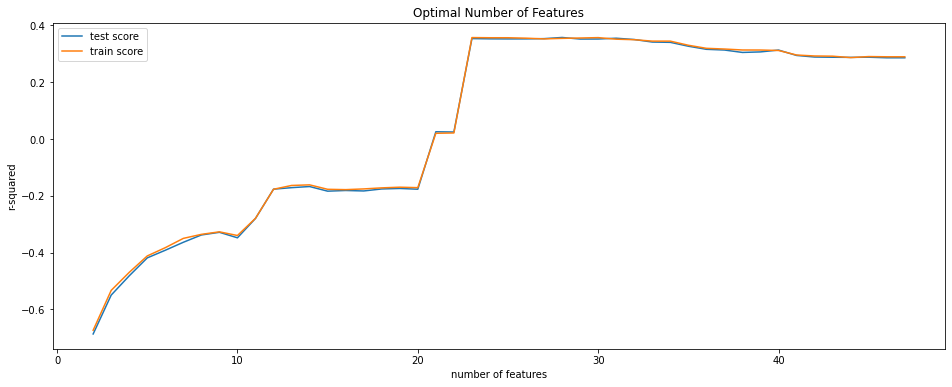

In [279]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In the above graph, we choose optimal number as 24, because after applying RFE() method the selection gradually reduces to significant number, to identify the important features. So,here the optimal number features obtained using KFold,GridSearchCV and RFE techniques is 24.

In [280]:
# # final model
from sklearn import metrics as sme
n_features_optimal = 24

logreg = LogisticRegression()
logreg.fit(X_log_train, y_log_train)

rfe = RFE(logreg, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_log_train, y_log_train)

In [281]:
# RFE supported/non-supported boolean values
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False])

In [282]:
# Below is the list of columns with RFE support expressed in terms of boolean values and also ranks suggested by RFE
list(zip(X_log_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 12),
 ('onnet_mou_6', False, 11),
 ('offnet_mou_6', False, 13),
 ('loc_og_t2f_mou_6', False, 10),
 ('loc_og_t2c_mou_8', False, 7),
 ('loc_og_mou_6', False, 15),
 ('std_og_t2f_mou_6', False, 5),
 ('spl_og_mou_6', False, 2),
 ('loc_ic_t2f_mou_6', False, 17),
 ('loc_ic_mou_6', False, 21),
 ('std_ic_t2t_mou_6', False, 22),
 ('std_ic_t2m_mou_6', False, 14),
 ('std_ic_t2f_mou_6', False, 16),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 20),
 ('ic_others_6', False, 4),
 ('total_rech_num_6', True, 1),
 ('max_rech_amt_6', False, 23),
 ('total_rech_data_6', True, 1),
 ('max_rech_data_6', False, 3),
 ('max_rech_data_8', True, 1),
 ('vol_2g_mb_6', False, 18),
 ('monthly_2g_6', True, 1),
 ('aon', False, 19),
 ('cat_loc_og_t2t_6_Medium', True, 1),
 ('cat_loc_og_t2t_7_Medium', True, 1),
 ('cat_loc_og_t2t_8_Medium', True, 1),
 ('cat_loc_og_t2m_6_Medium', True, 1),
 ('cat_loc_og_t2m_7_Medium', True, 1),
 ('cat_loc_og_t2m_8_Medium', True, 1),
 ('cat_total_og_6_Medium', True, 1

In [283]:
col_rfe_support = X_log_train.columns[rfe.support_]

In [284]:
# The below are the columns selected by RFE procedure
col_rfe_support

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_6_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_loc_og_t2m_8_Medium', 'cat_total_og_6_Medium',
       'cat_total_og_7_Medium', 'cat_total_og_8_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'cat_loc_ic_t2m_8_Medium',
       'cat_total_ic_6_Medium', 'cat_total_ic_7_Medium',
       'cat_total_ic_8_Medium', 'spl_ic_mou_6_7_months'],
      dtype='object')

### 6.b Correlation Matrix

In [285]:
# Let's copy X_l_train_s dataframe's columns to 'Sample' dataframe to check correlation among their features
Sample=X_log_train[col_rfe_support]

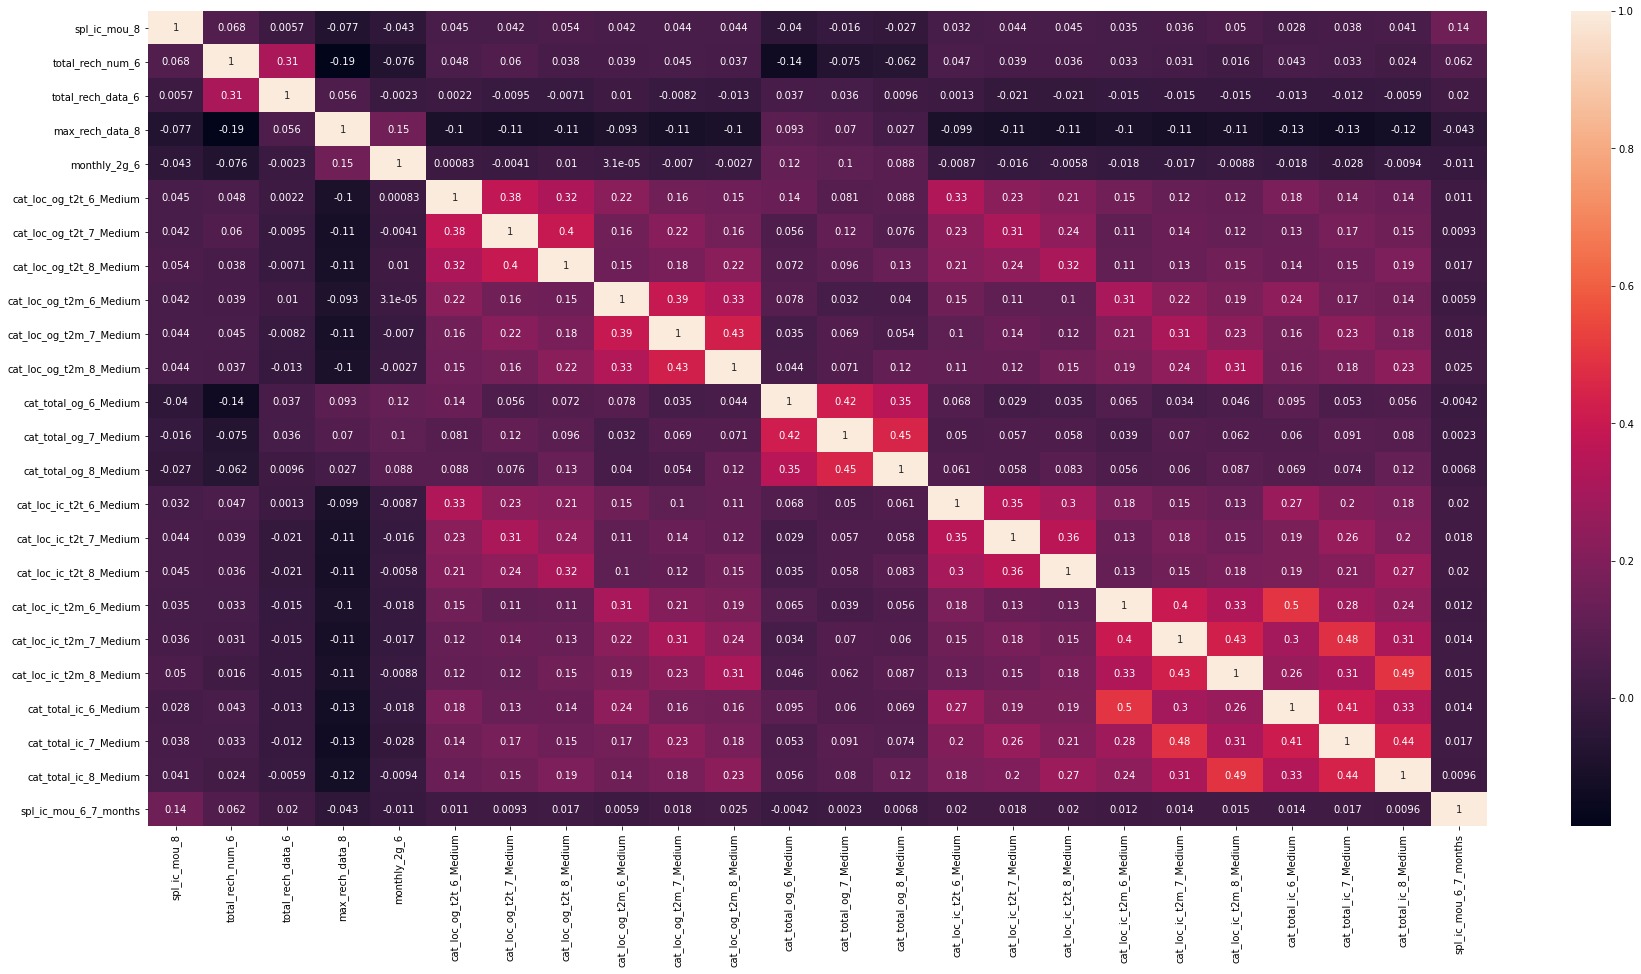

In [286]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(Sample.corr(),annot = True)

### Dropping highly correlated  features

In [287]:
# We create a set to store unique variables/features

corr_rfe_features=set()
corr_rfe_matrix = Sample.corr()

In [288]:
for i in range(len(corr_rfe_matrix.columns)):
    for j in range(i):
        if abs(corr_rfe_matrix.iloc[i, j]) > 0.40:
            colname = corr_rfe_matrix.columns[i]
            corr_rfe_features.add(colname)

In [289]:
# Total number of correlated features
len(corr_rfe_features)

7

In [290]:
# Total correlated features
print(corr_rfe_features)

{'cat_total_og_8_Medium', 'cat_loc_ic_t2m_8_Medium', 'cat_total_ic_8_Medium', 'cat_loc_og_t2m_8_Medium', 'cat_total_ic_7_Medium', 'cat_total_og_7_Medium', 'cat_total_ic_6_Medium'}


In [291]:
# We remove the features which are highly correlated with each other which are not useful foe building model

Sample.drop(labels=corr_rfe_features, axis=1, inplace=True)

In [292]:
Sample.shape

(27237, 17)

In [293]:
col_non_corr_features=Sample.columns.tolist()
col_non_corr_features

['spl_ic_mou_8',
 'total_rech_num_6',
 'total_rech_data_6',
 'max_rech_data_8',
 'monthly_2g_6',
 'cat_loc_og_t2t_6_Medium',
 'cat_loc_og_t2t_7_Medium',
 'cat_loc_og_t2t_8_Medium',
 'cat_loc_og_t2m_6_Medium',
 'cat_loc_og_t2m_7_Medium',
 'cat_total_og_6_Medium',
 'cat_loc_ic_t2t_6_Medium',
 'cat_loc_ic_t2t_7_Medium',
 'cat_loc_ic_t2t_8_Medium',
 'cat_loc_ic_t2m_6_Medium',
 'cat_loc_ic_t2m_7_Medium',
 'spl_ic_mou_6_7_months']

In [294]:
sca= StandardScaler()

In [295]:
X_log_train=X_log_train[col_non_corr_features]

### 6.c Assessing the model with Statsmodel

In [296]:
import statsmodels.api as sm
X_log_train_sm = sm.add_constant(X_log_train)
logm = sm.GLM(y_log_train,X_log_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                27237
Model:                            GLM   Df Residuals:                    27219
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11626.
Date:                Fri, 25 Nov 2022   Deviance:                       23253.
Time:                        20:58:52   Pearson chi2:                 1.69e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3667      0.041    -32.939      0.000      -1.448      -1.285
spl_ic_mou_8                0.4480      0.164      2.739      0.006       0.127       0.769
total_rech_num_6           -0.0160      0.002     -6.953      0.000      -0.021      -0.011
total_rech_data_6           0.3295      0.012     28.456      0.000       0.307       0.352
max_rech_data_8             0.0172      0.000     71.004      0.000       0.017       0.018
monthly_2g_6                0.2290      0.045      5.050      0.000       0.140       0.318
cat_loc_og_t2t_6_Medium    -0.2739      0.045     -6.064      0.000      -0.362      -0.185
cat_loc_og_t2t_7_Medium    -0.2181      0.046     -4.744      0.000      -0.308      -0.128
cat_loc_og_t2t_8_Medium    -0.3037      0.046     -6.602      0.000      -0.394      -0.214
cat_loc_og_t2m_6_Medium    -0.0454      0.046     -0.995      0.320      -0.135       0.044
cat_loc_og_t2m_7_Medium    -0.3610      0.047     -7.646      0.000      -0.454      -0.268
cat_total_og_6_Medium       0.3584      0.041      8.690      0.000       0.278       0.439
cat_loc_ic_t2t_6_Medium    -0.3139      0.043     -7.358      0.000      -0.397      -0.230
cat_loc_ic_t2t_7_Medium    -0.3625      0.044     -8.333      0.000      -0.448      -0.277
cat_loc_ic_t2t_8_Medium    -0.2980      0.043     -6.934      0.000      -0.382      -0.214
cat_loc_ic_t2m_6_Medium    -0.2945      0.043     -6.804      0.000      -0.379      -0.210
cat_loc_ic_t2m_7_Medium    -0.4458      0.044    -10.141      0.000      -0.532      -0.360
spl_ic_mou_6_7_months      -0.4108      0.161     -2.547      0.011      -0.727      -0.095
===========================================================================================
"""

### checking VIF values for features obtained from RFE

In [297]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [298]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_log_train.columns
vif['VIF'] = [variance_inflation_factor(X_log_train.values, i) for i in range(X_log_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          total_rech_num_6  2.36
2         total_rech_data_6  1.88
6   cat_loc_og_t2t_7_Medium  1.81
12  cat_loc_ic_t2t_7_Medium  1.78
5   cat_loc_og_t2t_6_Medium  1.77
11  cat_loc_ic_t2t_6_Medium  1.76
15  cat_loc_ic_t2m_7_Medium  1.72
14  cat_loc_ic_t2m_6_Medium  1.72
7   cat_loc_og_t2t_8_Medium  1.71
13  cat_loc_ic_t2t_8_Medium  1.71
8   cat_loc_og_t2m_6_Medium  1.67
9   cat_loc_og_t2m_7_Medium  1.64
3           max_rech_data_8  1.55
10    cat_total_og_6_Medium  1.34
4              monthly_2g_6  1.17
16    spl_ic_mou_6_7_months  1.14
0              spl_ic_mou_8  1.10

In [299]:
results_summary = res.summary()
results_as_html = results_summary.tables[1].as_html()
res_df=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [300]:
res_df

coef  std err       z  P>|z|  [0.025  0.975]
const                   -1.3667    0.041 -32.939  0.000  -1.448  -1.285
spl_ic_mou_8             0.4480    0.164   2.739  0.006   0.127   0.769
total_rech_num_6        -0.0160    0.002  -6.953  0.000  -0.021  -0.011
total_rech_data_6        0.3295    0.012  28.456  0.000   0.307   0.352
max_rech_data_8          0.0172    0.000  71.004  0.000   0.017   0.018
monthly_2g_6             0.2290    0.045   5.050  0.000   0.140   0.318
cat_loc_og_t2t_6_Medium -0.2739    0.045  -6.064  0.000  -0.362  -0.185
cat_loc_og_t2t_7_Medium -0.2181    0.046  -4.744  0.000  -0.308  -0.128
cat_loc_og_t2t_8_Medium -0.3037    0.046  -6.602  0.000  -0.394  -0.214
cat_loc_og_t2m_6_Medium -0.0454    0.046  -0.995  0.320  -0.135   0.044
cat_loc_og_t2m_7_Medium -0.3610    0.047  -7.646  0.000  -0.454  -0.268
cat_total_og_6_Medium    0.3584    0.041   8.690  0.000   0.278   0.439
cat_loc_ic_t2t_6_Medium -0.3139    0.043  -7.358  0.000  -0.397  -0.230
cat_loc_ic_t2t_7_Medium -0.3625    0.044  -8.333  0.000  -0.448  -0.277
cat_loc_ic_t2t_8_Medium -0.2980    0.043  -6.934  0.000  -0.382  -0.214
cat_loc_ic_t2m_6_Medium -0.2945    0.043  -6.804  0.000  -0.379  -0.210
cat_loc_ic_t2m_7_Medium -0.4458    0.044 -10.141  0.000  -0.532  -0.360
spl_ic_mou_6_7_months   -0.4108    0.161  -2.547  0.011  -0.727  -0.095

In [301]:
res_df.index.values

array(['const', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_6_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'], dtype=object)

In [302]:
res_df['P>|z|'].idxmax()

'cat_loc_og_t2m_6_Medium'

In [303]:
res_df['P>|z|'].values

array([0.   , 0.006, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.32 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.011])

In [304]:
res_list=res_df['P>|z|'].values.tolist()
res_list

[0.0,
 0.006,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.32,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011000000000000001]

In [305]:
for i in range(len(res_list)):
    if res_list[i]>0.05:
        res_df.drop(res_df['P>|z|'].idxmax(),inplace=True)
        break

In [306]:
res_df.index.values

array(['const', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'], dtype=object)

In [307]:
res_df.index[1:,]

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'],
      dtype='object')

In [308]:
X_log_train=X_log_train[res_df.index[1:,]]
X_log_train

spl_ic_mou_8  total_rech_num_6  total_rech_data_6  max_rech_data_8  \
2934           0.00                19           1.000000        25.000000   
22356          0.00                10           2.000000       101.000000   
11303          0.25                 8           1.000000        98.000000   
14063          0.00                19           6.000000        98.000000   
13537          0.00                18           4.000000        25.000000   
...             ...               ...                ...              ...   
16304          0.00                 4           1.000000       252.000000   
79             0.00                 5           1.000000       252.000000   
12119          0.00                 8           3.000000       252.000000   
14147          0.00                 7           1.000000       154.000000   
38408          0.00                11           1.535344        80.758677   

       monthly_2g_6  cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
2934              0                        0                        1   
22356             1                        0                        0   
11303             0                        1                        0   
14063             0                        0                        0   
13537             0                        1                        1   
...             ...                      ...                      ...   
16304             0                        1                        1   
79                0                        0                        0   
12119             1                        1                        0   
14147             1                        0                        0   
38408             1                        0                        0   

       cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_7_Medium  \
2934                         0                        1   
22356                        1                        0   
11303                        1                        1   
14063                        0                        0   
13537                        1                        1   
...                        ...                      ...   
16304                        1                        0   
79                           0                        0   
12119                        1                        0   
14147                        0                        0   
38408                        0                        0   

       cat_total_og_6_Medium  cat_loc_ic_t2t_6_Medium  \
2934                       0                        0   
22356                      1                        1   
11303                      0                        0   
14063                      0                        0   
13537                      0                        1   
...                      ...                      ...   
16304                      1                        1   
79                         0                        0   
12119                      1                        0   
14147                      0                        0   
38408                      1                        0   

       cat_loc_ic_t2t_7_Medium  cat_loc_ic_t2t_8_Medium  \
2934                         1                        1   
22356                        1                        1   
11303                        0                        0   
14063                        0                        0   
13537                        1                        1   
...                        ...                      ...   
16304                        1                        0   
79                           0                        0   
12119                        1                        0   
14147                        0                        0   
38408                        0                        0   

       cat_loc_ic_t2m_6_Medium  cat_loc_ic_t2m_7_Medium  spl_ic_mou_6_7_months  
2934                 

In [309]:
X_log_train.columns

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'],
      dtype='object')

### Assessing the models with StatsModels

In [310]:
X_train_sm = sm.add_constant(X_log_train)
logm = sm.GLM(y_log_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                27237
Model:                            GLM   Df Residuals:                    27220
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11627.
Date:                Fri, 25 Nov 2022   Deviance:                       23254.
Time:                        20:58:56   Pearson chi2:                 1.70e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3691      0.041    -33.052      0.000      -1.450      -1.288
spl_ic_mou_8                0.4435      0.164      2.712      0.007       0.123       0.764
total_rech_num_6           -0.0160      0.002     -6.958      0.000      -0.021      -0.011
total_rech_data_6           0.3293      0.012     28.447      0.000       0.307       0.352
max_rech_data_8             0.0172      0.000     71.027      0.000       0.017       0.018
monthly_2g_6                0.2285      0.045      5.040      0.000       0.140       0.317
cat_loc_og_t2t_6_Medium    -0.2792      0.045     -6.227      0.000      -0.367      -0.191
cat_loc_og_t2t_7_Medium    -0.2182      0.046     -4.746      0.000      -0.308      -0.128
cat_loc_og_t2t_8_Medium    -0.3048      0.046     -6.628      0.000      -0.395      -0.215
cat_loc_og_t2m_7_Medium    -0.3757      0.045     -8.377      0.000      -0.464      -0.288
cat_total_og_6_Medium       0.3570      0.041      8.662      0.000       0.276       0.438
cat_loc_ic_t2t_6_Medium    -0.3150      0.043     -7.389      0.000      -0.399      -0.231
cat_loc_ic_t2t_7_Medium    -0.3620      0.043     -8.321      0.000      -0.447      -0.277
cat_loc_ic_t2t_8_Medium    -0.2979      0.043     -6.930      0.000      -0.382      -0.214
cat_loc_ic_t2m_6_Medium    -0.3034      0.042     -7.162      0.000      -0.386      -0.220
cat_loc_ic_t2m_7_Medium    -0.4467      0.044    -10.163      0.000      -0.533      -0.361
spl_ic_mou_6_7_months      -0.4099      0.161     -2.542      0.011      -0.726      -0.094
===========================================================================================
"""

In [311]:
results_summary = res.summary()
results_as_html = results_summary.tables[1].as_html()
res_df=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [312]:
res_df['P>|z|'].idxmax()

'spl_ic_mou_6_7_months'

In [313]:
res_list=res_df['P>|z|'].values.tolist()
res_list

[0.0,
 0.006999999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011000000000000001]

In [314]:
for i in range(len(res_list)):
    if res_list[i]>0.05:
        res_df.drop(res_df['P>|z|'].idxmax(),inplace=True)
        break

In [315]:
res_df.index.values

array(['const', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'], dtype=object)

In [316]:
res_df.index[1:,]

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'],
      dtype='object')

In [317]:
X_log_train=X_log_train[res_df.index[1:,]]
X_log_train

spl_ic_mou_8  total_rech_num_6  total_rech_data_6  max_rech_data_8  \
2934           0.00                19           1.000000        25.000000   
22356          0.00                10           2.000000       101.000000   
11303          0.25                 8           1.000000        98.000000   
14063          0.00                19           6.000000        98.000000   
13537          0.00                18           4.000000        25.000000   
...             ...               ...                ...              ...   
16304          0.00                 4           1.000000       252.000000   
79             0.00                 5           1.000000       252.000000   
12119          0.00                 8           3.000000       252.000000   
14147          0.00                 7           1.000000       154.000000   
38408          0.00                11           1.535344        80.758677   

       monthly_2g_6  cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
2934              0                        0                        1   
22356             1                        0                        0   
11303             0                        1                        0   
14063             0                        0                        0   
13537             0                        1                        1   
...             ...                      ...                      ...   
16304             0                        1                        1   
79                0                        0                        0   
12119             1                        1                        0   
14147             1                        0                        0   
38408             1                        0                        0   

       cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_7_Medium  \
2934                         0                        1   
22356                        1                        0   
11303                        1                        1   
14063                        0                        0   
13537                        1                        1   
...                        ...                      ...   
16304                        1                        0   
79                           0                        0   
12119                        1                        0   
14147                        0                        0   
38408                        0                        0   

       cat_total_og_6_Medium  cat_loc_ic_t2t_6_Medium  \
2934                       0                        0   
22356                      1                        1   
11303                      0                        0   
14063                      0                        0   
13537                      0                        1   
...                      ...                      ...   
16304                      1                        1   
79                         0                        0   
12119                      1                        0   
14147                      0                        0   
38408                      1                        0   

       cat_loc_ic_t2t_7_Medium  cat_loc_ic_t2t_8_Medium  \
2934                         1                        1   
22356                        1                        1   
11303                        0                        0   
14063                        0                        0   
13537                        1                        1   
...                        ...                      ...   
16304                        1                        0   
79                           0                        0   
12119                        1                        0   
14147                        0                        0   
38408                        0                        0   

       cat_loc_ic_t2m_6_Medium  cat_loc_ic_t2m_7_Medium  spl_ic_mou_6_7_months  
2934                 

In [318]:
X_log_train.columns

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'monthly_2g_6', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'],
      dtype='object')

In [319]:
X_train_sm = sm.add_constant(X_log_train)
logm = sm.GLM(y_log_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                27237
Model:                            GLM   Df Residuals:                    27220
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11627.
Date:                Fri, 25 Nov 2022   Deviance:                       23254.
Time:                        20:58:57   Pearson chi2:                 1.70e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3691      0.041    -33.052      0.000      -1.450      -1.288
spl_ic_mou_8                0.4435      0.164      2.712      0.007       0.123       0.764
total_rech_num_6           -0.0160      0.002     -6.958      0.000      -0.021      -0.011
total_rech_data_6           0.3293      0.012     28.447      0.000       0.307       0.352
max_rech_data_8             0.0172      0.000     71.027      0.000       0.017       0.018
monthly_2g_6                0.2285      0.045      5.040      0.000       0.140       0.317
cat_loc_og_t2t_6_Medium    -0.2792      0.045     -6.227      0.000      -0.367      -0.191
cat_loc_og_t2t_7_Medium    -0.2182      0.046     -4.746      0.000      -0.308      -0.128
cat_loc_og_t2t_8_Medium    -0.3048      0.046     -6.628      0.000      -0.395      -0.215
cat_loc_og_t2m_7_Medium    -0.3757      0.045     -8.377      0.000      -0.464      -0.288
cat_total_og_6_Medium       0.3570      0.041      8.662      0.000       0.276       0.438
cat_loc_ic_t2t_6_Medium    -0.3150      0.043     -7.389      0.000      -0.399      -0.231
cat_loc_ic_t2t_7_Medium    -0.3620      0.043     -8.321      0.000      -0.447      -0.277
cat_loc_ic_t2t_8_Medium    -0.2979      0.043     -6.930      0.000      -0.382      -0.214
cat_loc_ic_t2m_6_Medium    -0.3034      0.042     -7.162      0.000      -0.386      -0.220
cat_loc_ic_t2m_7_Medium    -0.4467      0.044    -10.163      0.000      -0.533      -0.361
spl_ic_mou_6_7_months      -0.4099      0.161     -2.542      0.011      -0.726      -0.094
===========================================================================================
"""

In [320]:
# Selected Features
col_zero_pvalue=X_log_train.columns.tolist()

In [321]:
X_log_train.shape

(27237, 16)

In [322]:
X_log_test=X_log_test[col_zero_pvalue]

In [323]:
# Check the shape of X_l_test_s_2 dataframe
X_log_test.shape

(11673, 16)

In [324]:
# X_rfe_train is used for boosting classifiers

X_rfe_train=X_log_train.copy()

In [325]:
# X_rfe_test is used for boosting classifiers

X_rfe_test=X_log_test.copy()

In [326]:
# y_rfe_train and y_rfe_test is used for boosting classifiers

y_rfe_train = y_train.copy()
y_rfe_test = y_test.copy()

In [327]:
# Check the shape of X_log_test dataframe
X_log_test.shape

(11673, 16)

In [328]:
X_test_sm = sm.add_constant(X_log_test)
logm2 = sm.GLM(y_log_test,X_test_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11673
Model:                            GLM   Df Residuals:                    11656
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4993.9
Date:                Fri, 25 Nov 2022   Deviance:                       9987.7
Time:                        20:58:58   Pearson chi2:                 2.47e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4157      0.063    -22.417      0.000      -1.539      -1.292
spl_ic_mou_8               -0.2464      0.255     -0.964      0.335      -0.747       0.254
total_rech_num_6           -0.0143      0.003     -4.144      0.000      -0.021      -0.008
total_rech_data_6           0.3143      0.017     18.846      0.000       0.282       0.347
max_rech_data_8             0.0177      0.000     46.831      0.000       0.017       0.018
monthly_2g_6               -0.0096      0.069     -0.139      0.889      -0.145       0.125
cat_loc_og_t2t_6_Medium    -0.4028      0.068     -5.913      0.000      -0.536      -0.269
cat_loc_og_t2t_7_Medium    -0.1633      0.069     -2.358      0.018      -0.299      -0.028
cat_loc_og_t2t_8_Medium    -0.2921      0.069     -4.209      0.000      -0.428      -0.156
cat_loc_og_t2m_7_Medium    -0.4853      0.068     -7.087      0.000      -0.620      -0.351
cat_total_og_6_Medium       0.4471      0.063      7.121      0.000       0.324       0.570
cat_loc_ic_t2t_6_Medium    -0.1989      0.064     -3.109      0.002      -0.324      -0.073
cat_loc_ic_t2t_7_Medium    -0.2922      0.066     -4.437      0.000      -0.421      -0.163
cat_loc_ic_t2t_8_Medium    -0.2723      0.065     -4.171      0.000      -0.400      -0.144
cat_loc_ic_t2m_6_Medium    -0.2201      0.065     -3.369      0.001      -0.348      -0.092
cat_loc_ic_t2m_7_Medium    -0.4021      0.068     -5.908      0.000      -0.535      -0.269
spl_ic_mou_6_7_months      -0.4015      0.276     -1.454      0.146      -0.943       0.140
===========================================================================================
"""

In [329]:
results_summary = res2.summary()
results_as_html = results_summary.tables[1].as_html()
res_df=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [330]:
res_list=res_df['P>|z|'].values.tolist()
res_list

[0.0,
 0.335,
 0.0,
 0.0,
 0.0,
 0.889,
 0.0,
 0.018000000000000002,
 0.0,
 0.0,
 0.0,
 0.002,
 0.0,
 0.0,
 0.001,
 0.0,
 0.146]

In [331]:
for i in range(len(res_list)):
    if res_list[i]>0.05:
        res_df.drop(res_df['P>|z|'].idxmax(),inplace=True)
        break

In [332]:
res_df['P>|z|'].idxmax()

'spl_ic_mou_8'

In [333]:
res_df.index.values

array(['const', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'], dtype=object)

In [334]:
res_df.index[1:,]

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium',
       'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'],
      dtype='object')

In [335]:
X_log_test=X_log_test[res_df.index[1:,]]
X_log_test

spl_ic_mou_8  total_rech_num_6  total_rech_data_6  max_rech_data_8  \
23292           0.0                13           2.000000       252.000000   
21048           0.0                 9           1.000000        25.000000   
20880           0.0                40          12.000000        25.000000   
7281            0.0                15           1.000000        25.000000   
31559           0.0                 7           1.000000       152.000000   
...             ...               ...                ...              ...   
36415           0.0                 6           1.855256        71.450458   
18128           0.0                 2           1.000000       252.000000   
648             0.0                 3           1.000000        25.000000   
5763            0.0                 8           1.000000        25.000000   
37749           0.0                10           3.975226        25.000000   

       cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
23292                        0                        0   
21048                        1                        1   
20880                        1                        0   
7281                         1                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        0                        0   
18128                        1                        0   
648                          0                        0   
5763                         1                        0   
37749                        0                        0   

       cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_7_Medium  \
23292                        0                        0   
21048                        0                        1   
20880                        1                        0   
7281                         0                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        0                        0   
18128                        0                        0   
648                          0                        0   
5763                         0                        0   
37749                        1                        0   

       cat_total_og_6_Medium  cat_loc_ic_t2t_6_Medium  \
23292                      0                        0   
21048                      0                        0   
20880                      1                        1   
7281                       0                        0   
31559                      1                        0   
...                      ...                      ...   
36415                      1                        0   
18128                      0                        0   
648                        0                        0   
5763                       0                        1   
37749                      0                        0   

       cat_loc_ic_t2t_7_Medium  cat_loc_ic_t2t_8_Medium  \
23292                        0                        0   
21048                        0                        0   
20880                        0                        1   
7281                         0                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        1                        1   
18128                        0                        0   
648                          0                        0   
5763                         0                        1   
37749                        0                        0   

       cat_loc_ic_t2m_6_Medium  cat_loc_ic_t2m_7_Medium  spl_ic_mou_6_7_months  
23292                        0                        0               0.000000  
21048                        1                        1               0.000000  
20880                      

In [336]:
X_log_test.columns

Index(['spl_ic_mou_8', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium',
       'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'],
      dtype='object')

In [337]:
X_test_sm = sm.add_constant(X_log_test)
logm2 = sm.GLM(y_log_test,X_test_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11673
Model:                            GLM   Df Residuals:                    11657
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4993.9
Date:                Fri, 25 Nov 2022   Deviance:                       9987.7
Time:                        20:59:00   Pearson chi2:                 2.44e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4156      0.063    -22.417      0.000      -1.539      -1.292
spl_ic_mou_8               -0.2455      0.255     -0.961      0.336      -0.746       0.255
total_rech_num_6           -0.0142      0.003     -4.142      0.000      -0.021      -0.008
total_rech_data_6           0.3143      0.017     18.848      0.000       0.282       0.347
max_rech_data_8             0.0177      0.000     48.977      0.000       0.017       0.018
cat_loc_og_t2t_6_Medium    -0.4029      0.068     -5.915      0.000      -0.536      -0.269
cat_loc_og_t2t_7_Medium    -0.1634      0.069     -2.358      0.018      -0.299      -0.028
cat_loc_og_t2t_8_Medium    -0.2925      0.069     -4.220      0.000      -0.428      -0.157
cat_loc_og_t2m_7_Medium    -0.4857      0.068     -7.096      0.000      -0.620      -0.352
cat_total_og_6_Medium       0.4465      0.063      7.126      0.000       0.324       0.569
cat_loc_ic_t2t_6_Medium    -0.1990      0.064     -3.109      0.002      -0.324      -0.074
cat_loc_ic_t2t_7_Medium    -0.2922      0.066     -4.437      0.000      -0.421      -0.163
cat_loc_ic_t2t_8_Medium    -0.2724      0.065     -4.172      0.000      -0.400      -0.144
cat_loc_ic_t2m_6_Medium    -0.2201      0.065     -3.370      0.001      -0.348      -0.092
cat_loc_ic_t2m_7_Medium    -0.4021      0.068     -5.907      0.000      -0.535      -0.269
spl_ic_mou_6_7_months      -0.4015      0.276     -1.454      0.146      -0.943       0.140
===========================================================================================
"""

In [338]:
results_summary = res2.summary()
results_as_html = results_summary.tables[1].as_html()
res_df=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [339]:
res_list=res_df['P>|z|'].values.tolist()
res_list

[0.0,
 0.336,
 0.0,
 0.0,
 0.0,
 0.0,
 0.018000000000000002,
 0.0,
 0.0,
 0.0,
 0.002,
 0.0,
 0.0,
 0.001,
 0.0,
 0.146]

In [340]:
for i in range(len(res_list)):
    if res_list[i]>0.05:
        res_df.drop(res_df['P>|z|'].idxmax(),inplace=True)
        break

In [341]:
res_df.index.values

array(['const', 'total_rech_num_6', 'total_rech_data_6',
       'max_rech_data_8', 'cat_loc_og_t2t_6_Medium',
       'cat_loc_og_t2t_7_Medium', 'cat_loc_og_t2t_8_Medium',
       'cat_loc_og_t2m_7_Medium', 'cat_total_og_6_Medium',
       'cat_loc_ic_t2t_6_Medium', 'cat_loc_ic_t2t_7_Medium',
       'cat_loc_ic_t2t_8_Medium', 'cat_loc_ic_t2m_6_Medium',
       'cat_loc_ic_t2m_7_Medium', 'spl_ic_mou_6_7_months'], dtype=object)

In [342]:
res_df.index[1:,]

Index(['total_rech_num_6', 'total_rech_data_6', 'max_rech_data_8',
       'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium',
       'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'],
      dtype='object')

In [343]:
X_log_test=X_log_test[res_df.index[1:,]]
X_log_test

total_rech_num_6  total_rech_data_6  max_rech_data_8  \
23292                13           2.000000       252.000000   
21048                 9           1.000000        25.000000   
20880                40          12.000000        25.000000   
7281                 15           1.000000        25.000000   
31559                 7           1.000000       152.000000   
...                 ...                ...              ...   
36415                 6           1.855256        71.450458   
18128                 2           1.000000       252.000000   
648                   3           1.000000        25.000000   
5763                  8           1.000000        25.000000   
37749                10           3.975226        25.000000   

       cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
23292                        0                        0   
21048                        1                        1   
20880                        1                        0   
7281                         1                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        0                        0   
18128                        1                        0   
648                          0                        0   
5763                         1                        0   
37749                        0                        0   

       cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_7_Medium  \
23292                        0                        0   
21048                        0                        1   
20880                        1                        0   
7281                         0                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        0                        0   
18128                        0                        0   
648                          0                        0   
5763                         0                        0   
37749                        1                        0   

       cat_total_og_6_Medium  cat_loc_ic_t2t_6_Medium  \
23292                      0                        0   
21048                      0                        0   
20880                      1                        1   
7281                       0                        0   
31559                      1                        0   
...                      ...                      ...   
36415                      1                        0   
18128                      0                        0   
648                        0                        0   
5763                       0                        1   
37749                      0                        0   

       cat_loc_ic_t2t_7_Medium  cat_loc_ic_t2t_8_Medium  \
23292                        0                        0   
21048                        0                        0   
20880                        0                        1   
7281                         0                        0   
31559                        0                        0   
...                        ...                      ...   
36415                        1                        1   
18128                        0                        0   
648                          0                        0   
5763                         0                        1   
37749                        0                        0   

       cat_loc_ic_t2m_6_Medium  cat_loc_ic_t2m_7_Medium  spl_ic_mou_6_7_months  
23292                        0                        0               0.000000  
21048                        1                        1               0.000000  
20880                        1                        1               0.000000  
7281                         0                        0               0.075000  
31559                        0   

In [344]:
test_cols=X_log_test.columns
X_log_test.columns

Index(['total_rech_num_6', 'total_rech_data_6', 'max_rech_data_8',
       'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium',
       'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'],
      dtype='object')

In [345]:
X_test_sm = sm.add_constant(X_log_test)
logm2 = sm.GLM(y_log_test,X_test_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11673
Model:                            GLM   Df Residuals:                    11658
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4994.3
Date:                Fri, 25 Nov 2022   Deviance:                       9988.7
Time:                        20:59:01   Pearson chi2:                 2.46e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4205      0.063    -22.554      0.000      -1.544      -1.297
total_rech_num_6           -0.0143      0.003     -4.159      0.000      -0.021      -0.008
total_rech_data_6           0.3142      0.017     18.843      0.000       0.282       0.347
max_rech_data_8             0.0177      0.000     49.063      0.000       0.017       0.018
cat_loc_og_t2t_6_Medium    -0.4036      0.068     -5.925      0.000      -0.537      -0.270
cat_loc_og_t2t_7_Medium    -0.1627      0.069     -2.349      0.019      -0.298      -0.027
cat_loc_og_t2t_8_Medium    -0.2944      0.069     -4.249      0.000      -0.430      -0.159
cat_loc_og_t2m_7_Medium    -0.4867      0.068     -7.114      0.000      -0.621      -0.353
cat_total_og_6_Medium       0.4488      0.063      7.168      0.000       0.326       0.571
cat_loc_ic_t2t_6_Medium    -0.1993      0.064     -3.115      0.002      -0.325      -0.074
cat_loc_ic_t2t_7_Medium    -0.2915      0.066     -4.427      0.000      -0.421      -0.162
cat_loc_ic_t2t_8_Medium    -0.2724      0.065     -4.172      0.000      -0.400      -0.144
cat_loc_ic_t2m_6_Medium    -0.2203      0.065     -3.372      0.001      -0.348      -0.092
cat_loc_ic_t2m_7_Medium    -0.4029      0.068     -5.921      0.000      -0.536      -0.270
spl_ic_mou_6_7_months      -0.4419      0.274     -1.612      0.107      -0.979       0.096
===========================================================================================
"""

In [346]:
col_zero_or_least_pvalue=X_log_test.columns.to_list()
col_zero_or_least_pvalue

['total_rech_num_6',
 'total_rech_data_6',
 'max_rech_data_8',
 'cat_loc_og_t2t_6_Medium',
 'cat_loc_og_t2t_7_Medium',
 'cat_loc_og_t2t_8_Medium',
 'cat_loc_og_t2m_7_Medium',
 'cat_total_og_6_Medium',
 'cat_loc_ic_t2t_6_Medium',
 'cat_loc_ic_t2t_7_Medium',
 'cat_loc_ic_t2t_8_Medium',
 'cat_loc_ic_t2m_6_Medium',
 'cat_loc_ic_t2m_7_Medium',
 'spl_ic_mou_6_7_months']

In [347]:
X_log_train=X_log_train[col_zero_or_least_pvalue]

In [348]:
X_train_sm = sm.add_constant(X_log_train)
logm3 = sm.GLM(y_log_train,X_train_sm, family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11673
Model:                            GLM   Df Residuals:                    11658
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4994.3
Date:                Fri, 25 Nov 2022   Deviance:                       9988.7
Time:                        20:59:01   Pearson chi2:                 2.46e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4205      0.063    -22.554      0.000      -1.544      -1.297
total_rech_num_6           -0.0143      0.003     -4.159      0.000      -0.021      -0.008
total_rech_data_6           0.3142      0.017     18.843      0.000       0.282       0.347
max_rech_data_8             0.0177      0.000     49.063      0.000       0.017       0.018
cat_loc_og_t2t_6_Medium    -0.4036      0.068     -5.925      0.000      -0.537      -0.270
cat_loc_og_t2t_7_Medium    -0.1627      0.069     -2.349      0.019      -0.298      -0.027
cat_loc_og_t2t_8_Medium    -0.2944      0.069     -4.249      0.000      -0.430      -0.159
cat_loc_og_t2m_7_Medium    -0.4867      0.068     -7.114      0.000      -0.621      -0.353
cat_total_og_6_Medium       0.4488      0.063      7.168      0.000       0.326       0.571
cat_loc_ic_t2t_6_Medium    -0.1993      0.064     -3.115      0.002      -0.325      -0.074
cat_loc_ic_t2t_7_Medium    -0.2915      0.066     -4.427      0.000      -0.421      -0.162
cat_loc_ic_t2t_8_Medium    -0.2724      0.065     -4.172      0.000      -0.400      -0.144
cat_loc_ic_t2m_6_Medium    -0.2203      0.065     -3.372      0.001      -0.348      -0.092
cat_loc_ic_t2m_7_Medium    -0.4029      0.068     -5.921      0.000      -0.536      -0.270
spl_ic_mou_6_7_months      -0.4419      0.274     -1.612      0.107      -0.979       0.096
===========================================================================================
"""

In [349]:
Final_columns=X_log_train.columns
Final_columns

Index(['total_rech_num_6', 'total_rech_data_6', 'max_rech_data_8',
       'cat_loc_og_t2t_6_Medium', 'cat_loc_og_t2t_7_Medium',
       'cat_loc_og_t2t_8_Medium', 'cat_loc_og_t2m_7_Medium',
       'cat_total_og_6_Medium', 'cat_loc_ic_t2t_6_Medium',
       'cat_loc_ic_t2t_7_Medium', 'cat_loc_ic_t2t_8_Medium',
       'cat_loc_ic_t2m_6_Medium', 'cat_loc_ic_t2m_7_Medium',
       'spl_ic_mou_6_7_months'],
      dtype='object')

In [350]:
X_log_train.head()

total_rech_num_6  total_rech_data_6  max_rech_data_8  \
2934                 19                1.0             25.0   
22356                10                2.0            101.0   
11303                 8                1.0             98.0   
14063                19                6.0             98.0   
13537                18                4.0             25.0   

       cat_loc_og_t2t_6_Medium  cat_loc_og_t2t_7_Medium  \
2934                         0                        1   
22356                        0                        0   
11303                        1                        0   
14063                        0                        0   
13537                        1                        1   

       cat_loc_og_t2t_8_Medium  cat_loc_og_t2m_7_Medium  \
2934                         0                        1   
22356                        1                        0   
11303                        1                        1   
14063                        0                        0   
13537                        1                        1   

       cat_total_og_6_Medium  cat_loc_ic_t2t_6_Medium  \
2934                       0                        0   
22356                      1                        1   
11303                      0                        0   
14063                      0                        0   
13537                      0                        1   

       cat_loc_ic_t2t_7_Medium  cat_loc_ic_t2t_8_Medium  \
2934                         1                        1   
22356                        1                        1   
11303                        0                        0   
14063                        0                        0   
13537                        1                        1   

       cat_loc_ic_t2m_6_Medium  cat_loc_ic_t2m_7_Medium  spl_ic_mou_6_7_months  
2934                         1                        0                  0.000  
22356                        0                        0                  0.000  
11303                        0                        0                  0.055  
14063                        1                        1                  0.030  
13537                        1                        0                  0.000

In [351]:
X_log_test=X_log_test[Final_columns]

In [352]:
# Getting the predicted values on the train set
y_pred = res2.predict(X_test_sm)
y_pred[:10]

23292    0.970411
21048    0.078134
20880    0.706130
7281     0.211761
31559    0.870569
6412     0.139970
19226    0.848165
35693    0.838102
37892    0.889763
21905    0.290920
dtype: float64

#### Creating a dataframe with the actual convert flag and the predicted probabilities

We create Churn Probability column from 'Churn' and predicted columns to determine customers who may churn in the "Churn phase" 

In [353]:
y_pred_final = pd.DataFrame({'Churn':y_log_test.values, 'Churn_Prob':y_pred})
y_pred_final.head()

Churn  Churn_Prob
23292      1    0.970411
21048      0    0.078134
20880      1    0.706130
7281       0    0.211761
31559      1    0.870569

In [354]:
y_pred_final.Churn_Prob.mean()

0.5032125417630458

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.50321 else 0

In [355]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.50321 else 0)

# Let's see the head
y_pred_final.head()

Churn  Churn_Prob  predicted
23292      1    0.970411          1
21048      0    0.078134          0
20880      1    0.706130          1
7281       0    0.211761          0
31559      1    0.870569          1

In [356]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
print(confusion)

[[5062  737]
 [1183 4691]]


In [357]:
# Let's check the overall accuracy.
print("Accuracy Score: ",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted))

Accuracy Score:  0.8355178617322025


In [358]:
### Checking the Churn Rate
churn = (sum(y_pred_final.predicted)/len(y_pred_final['predicted'].index))*100
print("Churn Rate: ",churn)

Churn Rate:  46.50047117279191


### 6.d Plotting ROC curve

In [359]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [360]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, 
                                         y_pred_final.predicted, drop_intermediate = False )

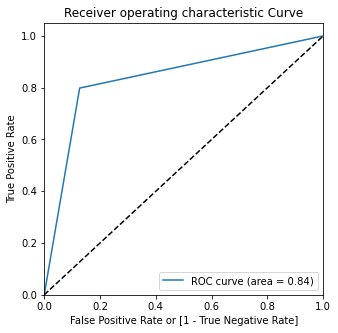

In [361]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [362]:
# Let's create columns with different Churn probability cutoffs 
Churn_prob = [float(x)/10 for x in range(10)] 
for i in Churn_prob:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
23292      1    0.970411          1    1    1    1    1    1    1    1    1   
21048      0    0.078134          0    1    0    0    0    0    0    0    0   
20880      1    0.706130          1    1    1    1    1    1    1    1    1   
7281       0    0.211761          0    1    1    1    0    0    0    0    0   
31559      1    0.870569          1    1    1    1    1    1    1    1    1   

       0.8  0.9  
23292    1    1  
21048    0    0  
20880    0    0  
7281     0    0  
31559    1    0

In [363]:
# Now let's calculate accuracy sensitivity and specificity for various Churn probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Churn_Prob','accuracy','sensitivity','specitivity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specitivity]

print(cutoff_df)

     Churn_Prob  accuracy  sensitivity  specitivity
0.0         0.0  0.503213     1.000000     0.000000
0.1         0.1  0.596248     0.988083     0.199345
0.2         0.2  0.730746     0.951992     0.506639
0.3         0.3  0.815300     0.906197     0.723228
0.4         0.4  0.845455     0.844059     0.846870
0.5         0.5  0.836289     0.800136     0.872909
0.6         0.6  0.816757     0.745489     0.888946
0.7         0.7  0.794826     0.680797     0.910329
0.8         0.8  0.750878     0.574055     0.929988
0.9         0.9  0.656301     0.353762     0.962752


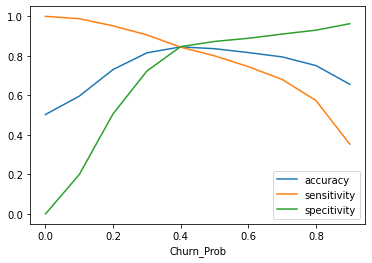

In [364]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Churn_Prob', y=['accuracy','sensitivity','specitivity'])
plt.show()

In [365]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

threshold = Find_Optimal_Cutoff(y_pred_final.Churn, 
                                         y_pred_final.Churn_Prob)
print("Threshold Value: ", threshold)

Threshold Value:  [0.396434787877676]


#### From the curve above, 0.39 is the optimum point to take it as a cutoff probability

In [366]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > round(threshold[0],2) else 0)

y_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
23292      1    0.970411          1    1    1    1    1    1    1    1    1   
21048      0    0.078134          0    1    0    0    0    0    0    0    0   
20880      1    0.706130          1    1    1    1    1    1    1    1    1   
7281       0    0.211761          0    1    1    1    0    0    0    0    0   
31559      1    0.870569          1    1    1    1    1    1    1    1    1   

       0.8  0.9  final_predicted  
23292    1    1                1  
21048    0    0                0  
20880    0    0                1  
7281     0    0                0  
31559    1    0                1

Text(0.5, 1.0, 'Predictions of Customers who will or will not Churn')

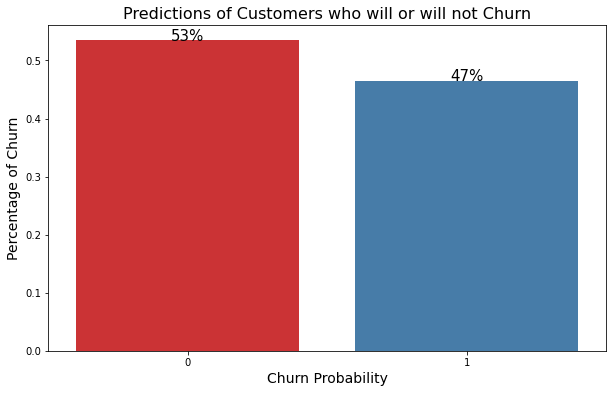

In [367]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
bar_graph = sns.barplot(y_pred_final['predicted'], y_pred_final['final_predicted'], palette='Set1', 
                        estimator=lambda x: len(x) / len(y_pred_final) )

#Annotating the graph
for p in bar_graph.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        bar_graph.text(x+width/2, y+height, '{:.0%}'.format(height), horizontalalignment='center',fontsize=15)

#Setting the labels for the graph
plt.xlabel('Churn Probability', fontsize=14)
plt.ylabel('Percentage of Churn', fontsize=14)
plt.title('Predictions of Customers who will or will not Churn', fontsize=16)

The bar graph between 'Percentage of Churn' and 'Churn Probability' says that 54% customers are satisfied with network but whereas 46% of customers are about to churn because they might be dissatisified with the network or thinking to leave the network because of other network's better offers. But we have to say that all this graph happening in the 'Good Phase' and 'Action Phase'. If the Network team focus on the 46% customers and can retain them through variuos plans and offers then network can be successful overcoming this issue.

### 6.f Gradient Boosting through RFE

In [368]:
X_rfe_train=X_log_train.loc[:,Final_columns]

In [369]:
X_rfe_trafin=X_log_train.loc[:,Final_columns]

In [370]:
X_rfe_test=X_log_test.loc[:,Final_columns]

In [371]:
X_rfe_tesfin=X_log_test.loc[:,Final_columns]

In [372]:
X_rfe_train=sca.fit_transform(X_rfe_train)
X_rfe_test=sca.transform(X_rfe_test)

In [373]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [374]:
# Gradientboost with the tree as base estimator
GBC_rfe = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [375]:
# run grid search
folds = 3
grid_search_GBC_rfe = GridSearchCV(GBC_rfe, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               n_jobs=8,
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC_rfe.fit(X_rfe_train, y_rfe_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             n_jobs=8,
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [376]:
cv_results = pd.DataFrame(grid_search_GBC_rfe.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.186046      0.064643         0.057993        0.018448   
1       7.639312      0.206478         0.067100        0.002771   
2       9.800740      0.054325         0.065989        0.001403   
3       4.698952      0.043643         0.052819        0.016176   
4       7.515088      0.109281         0.065994        0.002460   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.940079   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.941920   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.942849   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.931049   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.940837   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.942912           0.945434         0.942808        0.002188   
1           0.945472           0.947792         0.945061        0.002415   
2           0.947581           0.949100         0.946510        0.002662   
3           0.938447           0.940102         0.936533        0.003936   
4           0.945545           0.946163         0.944182        0.002378   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.949812            0.947756   
1                4            0.952313            0.950053   
2                2            0.952792            0.951166   
3                8            0.941757            0.945164   
4                5            0.951604            0.950870   

   split2_train_score  mean_train_score  std_train_score  
0            0.947959          0.948509         0.000925  
1            0.949706          0.950691         0.001156  
2            0.950517          0.951492         0.000957  
3            0.944347          0.943756         0.001452  
4            0.953611          0.952028         0.001159

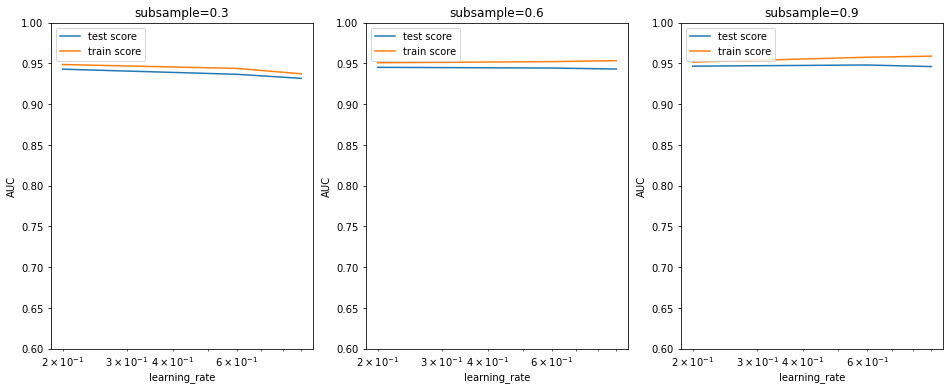

In [377]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [378]:
grid_search_GBC_rfe.best_estimator_

GradientBoostingClassifier(learning_rate=0.6, max_depth=2, n_estimators=200,
                           subsample=0.9)

In [379]:
GBC_rfe=grid_search_GBC_rfe.best_estimator_

GBC_rfe.fit(X_rfe_train,y_rfe_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=2, n_estimators=200,
                           subsample=0.9)

In [380]:
# predict on test data
rfe_GBC_predictions_test = GBC_rfe.predict(X_rfe_test)
rfe_GBC_predictions_test[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [381]:
rfe_GBC_rfe_acc_tes=GBC_rfe.score(X_rfe_test, y_rfe_test)
print("Accuracy of GradientBoost(RFE)for Test: ",rfe_GBC_rfe_acc_tes)

Accuracy of GradientBoost(RFE)for Test:  0.8902595733744538


In [382]:
# roc auc
rfe_roc_auc_GBC_test=metrics.roc_auc_score(y_rfe_test, rfe_GBC_predictions_test)
print("ROC AUC under GradientBoost for Test",rfe_roc_auc_GBC_test)

ROC AUC under GradientBoost for Test 0.8902192639673531


In [383]:
tempResults = pd.DataFrame({'Model':['GradientBoost(RFE) for Test'],  
                            'Accuracy': [rfe_GBC_rfe_acc_tes], 'ROC-AUC':[rfe_roc_auc_GBC_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy','ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811
0             Adaboost(PCA) for Test  0.773837  0.773909
0        GradientBoost(PCA) for Test  0.784546  0.784627
0              XGBoost(PCA) for Test  0.786173  0.786237
0        GradientBoost(RFE) for Test  0.890260  0.890219

### 6.g XG Boosting through RFE

In [384]:
# fit model on training data with default hyperparameters
xgb_rfe_model = xgb.XGBClassifier()
xgb_rfe_model.fit(X_rfe_train, y_rfe_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [385]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_rfe_pred_test = xgb_rfe_model.predict(X_rfe_test)
y_rfe_pred_test[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [386]:
# evaluate predictions
roc_test = metrics.roc_auc_score(y_rfe_test, y_rfe_pred_test)
print("AUC: %.2f%%" % (roc_test * 100.0))

AUC: 88.85%


In [387]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"base_estimator__max_depth" : [2, 5],
              'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_rfe_model = xgb.XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_rfe_model_cv = GridSearchCV(estimator = xgb_rfe_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        n_jobs=5,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [388]:
# fit the model
xgb_rfe_model_cv.fit(X_rfe_train, y_rfe_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[21:00:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator__max_depth" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                      

In [389]:
# cv results
rfe_cv_results = pd.DataFrame(xgb_rfe_model_cv.cv_results_)
rfe_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.692021      0.030650         0.039503        0.003956   
1        3.170899      0.120383         0.036319        0.002057   
2        3.045214      0.018437         0.041978        0.006671   
3        2.890229      0.009756         0.040296        0.005791   
4        3.271289      0.042128         0.038995        0.005706   
5        3.043480      0.014547         0.050004        0.010010   
6        2.873993      0.064602         0.040833        0.001644   
7        3.269859      0.006212         0.049837        0.007984   
8        3.073275      0.057042         0.034339        0.001246   
9        2.870878      0.021150         0.042013        0.007356   
10       3.257954      0.084259         0.040323        0.008728   
11       2.485139      0.762932         0.029003        0.006422   

   param_base_estimator__max_depth param_learning_rate param_subsample  \
0                                2                 0.2             0.3   
1                                2                 0.2             0.6   
2                                2                 0.2             0.9   
3                                2                 0.6             0.3   
4                                2                 0.6             0.6   
5                                2                 0.6             0.9   
6                                5                 0.2             0.3   
7                                5                 0.2             0.6   
8                                5                 0.2             0.9   
9                                5                 0.6             0.3   
10                               5                 0.6             0.6   
11                               5                 0.6             0.9   

                                               params  split0_test_score  \
0   {'base_estimator__max_depth': 2, 'learning_rat...           0.941449   
1   {'base_estimator__max_depth': 2, 'learning_rat...           0.943014   
2   {'base_estimator__max_depth': 2, 'learning_rat...           0.943989   
3   {'base_estimator__max_depth': 2, 'learning_rat...           0.943246   
4   {'base_estimator__max_depth': 2, 'learning_rat...           0.944563   
5   {'base_estimator__max_depth': 2, 'learning_rat...           0.945916   
6   {'base_estimator__max_depth': 5, 'learning_rat...           0.941449   
7   {'base_estimator__max_depth': 5, 'learning_rat...           0.943014   
8   {'base_estimator__max_depth': 5, 'learning_rat...           0.943989   
9   {'base_estimator__max_depth': 5, 'learning_rat...           0.943246   
10  {'base_estimator__max_depth': 5, 'learning_rat...           0.944563   
11  {'base_estimator__max_depth': 5, 'learning_rat...           0.945916   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.945245           0.947919         0.944871        0.002655   
1            0.946920           0.948615         0.946183        0.002345   
2            0.947551           0.949400         0.946980        0.002246   
3            0.944621           0.945402         0.944423        0.000891   
4            0.948243           0.948455         0.947087        0.001787   
5            0.949340           0.950708         0.948655        0.002016   
6            0.945245           0.947919         0.944871        0.002655   
7            0.946920           0.948615         0.946183        0.002345   
8            0.947551           0.949400         0.946980        0.002246   
9            0.944621           0.945402         0.944423        0.000891   
10           0.948243           0.948455         0.947087        0.001787   
11           0.949340           0.950708         0.948655        0.002016   

    rank_test_score  split0_train_score  split1_train_score  \
0                 9            0.950802            0.948844   
1                 7            0.952482

In [390]:
# convert parameters to int for plotting on x-axis
rfe_cv_results['param_learning_rate'] = rfe_cv_results['param_learning_rate'].astype('float')
rfe_cv_results['param_max_depth'] = rfe_cv_results['param_base_estimator__max_depth'].astype('float')
rfe_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.692021      0.030650         0.039503        0.003956   
1       3.170899      0.120383         0.036319        0.002057   
2       3.045214      0.018437         0.041978        0.006671   
3       2.890229      0.009756         0.040296        0.005791   
4       3.271289      0.042128         0.038995        0.005706   

  param_base_estimator__max_depth  param_learning_rate param_subsample  \
0                               2                  0.2             0.3   
1                               2                  0.2             0.6   
2                               2                  0.2             0.9   
3                               2                  0.6             0.3   
4                               2                  0.6             0.6   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'learning_rat...           0.941449   
1  {'base_estimator__max_depth': 2, 'learning_rat...           0.943014   
2  {'base_estimator__max_depth': 2, 'learning_rat...           0.943989   
3  {'base_estimator__max_depth': 2, 'learning_rat...           0.943246   
4  {'base_estimator__max_depth': 2, 'learning_rat...           0.944563   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.945245           0.947919         0.944871        0.002655   
1           0.946920           0.948615         0.946183        0.002345   
2           0.947551           0.949400         0.946980        0.002246   
3           0.944621           0.945402         0.944423        0.000891   
4           0.948243           0.948455         0.947087        0.001787   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.950802            0.948844   
1                7            0.952482            0.950654   
2                5            0.952826            0.951232   
3               11            0.954788            0.951900   
4                3            0.957875            0.955527   

   split2_train_score  mean_train_score  std_train_score  param_max_depth  
0            0.949299          0.949648         0.000837              2.0  
1            0.950551          0.951229         0.000887              2.0  
2            0.950315          0.951457         0.001038              2.0  
3            0.951221          0.952637         0.001547              2.0  
4            0.954695          0.956033         0.001346              2.0

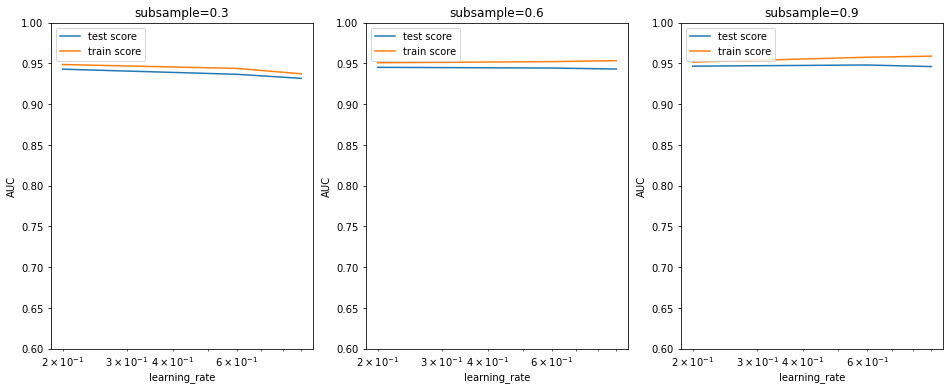

In [391]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [392]:
xgb_rfe_model_cv.best_estimator_

XGBClassifier(base_estimator__max_depth=2, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [393]:
# fit model on training data
xgb_rfemodel = xgb_rfe_model_cv.best_estimator_#(params = params)
xgb_rfemodel.fit(X_rfe_train, y_rfe_train)

[21:00:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator__max_depth" } are not used.



XGBClassifier(base_estimator__max_depth=2, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [394]:
# predict
rfe_XGB_predictions_test = xgb_rfemodel.predict(X_rfe_test)
rfe_XGB_predictions_test[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [395]:
rfe_XGB_acc_test=xgb_rfemodel.score(X_rfe_test, y_rfe_test)
print("Accuracy of XGBoost(RFE)for Test: ",rfe_XGB_acc_test)

Accuracy of XGBoost(RFE)for Test:  0.8920585967617579


In [396]:
# roc auc
rfe_roc_auc_XGB_test=metrics.roc_auc_score(y_rfe_test, rfe_XGB_predictions_test)
print("ROC AUC under XGBoost(RFE) for Test",rfe_roc_auc_XGB_test)

ROC AUC under XGBoost(RFE) for Test 0.8920046004902751


In [397]:
tempResults = pd.DataFrame({'Model':['XGBoost(RFE) for Test'],  
                            'Accuracy': [rfe_XGB_acc_test], 'ROC-AUC':[rfe_roc_auc_XGB_test]})
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy','ROC-AUC']]
results

Model  Accuracy   ROC-AUC
0         Random Classifier for Test  0.718753  0.718733
0  Decision Tree classifier for Test  0.733659  0.733473
0  Logistic regression(PCA) for Test  0.776664  0.776811
0             Adaboost(PCA) for Test  0.773837  0.773909
0        GradientBoost(PCA) for Test  0.784546  0.784627
0              XGBoost(PCA) for Test  0.786173  0.786237
0        GradientBoost(RFE) for Test  0.890260  0.890219
0              XGBoost(RFE) for Test  0.892059  0.892005

## 7. Analysis and Answers

Q) Which model is best and why? 

A)

As we can see the above table, we prefer XGBoosting Classifier is the best model when going through PCA or RFE feature engineering techniques. XGBoost acquires maximum area under curve as well as possess significant accuracy to explain features behaviour.

We also observe that the GradientBoosting classifier is also best next to XGBoosting as it holds good Accuracy and ROC-AUC values. Here LogisticRegression through RFE is gaining more weight over Logistic Regression through PCA.

In [398]:
# feature importance
importance = dict(zip(X_rfe_trafin.columns, xgb_rfemodel.feature_importances_))
importance

{'total_rech_num_6': 0.012192992,
 'total_rech_data_6': 0.087208405,
 'max_rech_data_8': 0.38201296,
 'cat_loc_og_t2t_6_Medium': 0.014522228,
 'cat_loc_og_t2t_7_Medium': 0.040192217,
 'cat_loc_og_t2t_8_Medium': 0.08087326,
 'cat_loc_og_t2m_7_Medium': 0.051794074,
 'cat_total_og_6_Medium': 0.022786237,
 'cat_loc_ic_t2t_6_Medium': 0.07454704,
 'cat_loc_ic_t2t_7_Medium': 0.060486376,
 'cat_loc_ic_t2t_8_Medium': 0.05061155,
 'cat_loc_ic_t2m_6_Medium': 0.03186267,
 'cat_loc_ic_t2m_7_Medium': 0.06277021,
 'spl_ic_mou_6_7_months': 0.028139845}

<BarContainer object of 14 artists>

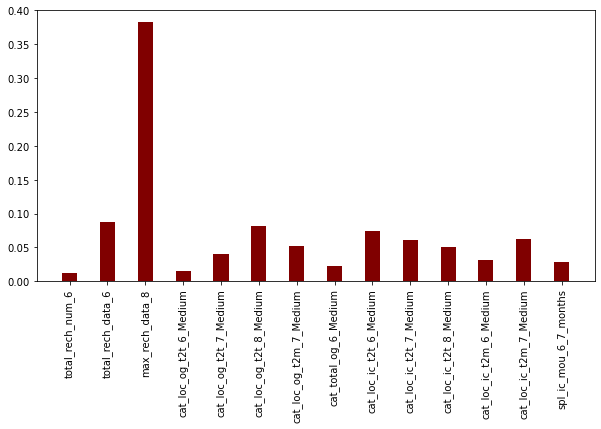

In [399]:
features=list(importance.keys())
fvalues=list(importance.values())
fig=plt.figure(figsize=(10,5))

#creating the bar plot
plt.xticks(rotation='vertical')
plt.bar(features, fvalues, color='maroon', width=0.4)

In [400]:
features=list(importance.keys())
features

['total_rech_num_6',
 'total_rech_data_6',
 'max_rech_data_8',
 'cat_loc_og_t2t_6_Medium',
 'cat_loc_og_t2t_7_Medium',
 'cat_loc_og_t2t_8_Medium',
 'cat_loc_og_t2m_7_Medium',
 'cat_total_og_6_Medium',
 'cat_loc_ic_t2t_6_Medium',
 'cat_loc_ic_t2t_7_Medium',
 'cat_loc_ic_t2t_8_Medium',
 'cat_loc_ic_t2m_6_Medium',
 'cat_loc_ic_t2m_7_Medium',
 'spl_ic_mou_6_7_months']

In [401]:
fvalues=list(importance.values())
fvalues

[0.012192992,
 0.087208405,
 0.38201296,
 0.014522228,
 0.040192217,
 0.08087326,
 0.051794074,
 0.022786237,
 0.07454704,
 0.060486376,
 0.05061155,
 0.03186267,
 0.06277021,
 0.028139845]

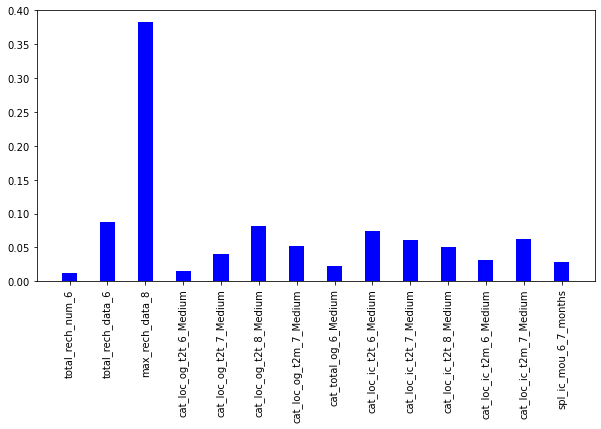

In [402]:
fig=plt.figure(figsize=(10,5))
plt.bar(features,fvalues,color='blue',width=0.4)
plt.xticks(features,rotation='vertical')
plt.show()

In [403]:
# All the final features displayed in descending order
sorted(importance.items(), key=lambda x:x[1],reverse=True)

[('max_rech_data_8', 0.38201296),
 ('total_rech_data_6', 0.087208405),
 ('cat_loc_og_t2t_8_Medium', 0.08087326),
 ('cat_loc_ic_t2t_6_Medium', 0.07454704),
 ('cat_loc_ic_t2m_7_Medium', 0.06277021),
 ('cat_loc_ic_t2t_7_Medium', 0.060486376),
 ('cat_loc_og_t2m_7_Medium', 0.051794074),
 ('cat_loc_ic_t2t_8_Medium', 0.05061155),
 ('cat_loc_og_t2t_7_Medium', 0.040192217),
 ('cat_loc_ic_t2m_6_Medium', 0.03186267),
 ('spl_ic_mou_6_7_months', 0.028139845),
 ('cat_total_og_6_Medium', 0.022786237),
 ('cat_loc_og_t2t_6_Medium', 0.014522228),
 ('total_rech_num_6', 0.012192992)]

In [404]:
xgb.__version__

'1.7.1'

In [405]:
#!pip install xgboost==1.7.1

## Saving the Model

In [406]:
import pickle

# from xgboost import Booster

# booster = Booster()
# model = booster.load_model("C:\Users\MahaGaNapathi\Downloads\END2END\TELECOM-CHURN\")

#dump information to that file
pickle.dump(xgb_rfemodel,open('model.pkl','wb'))

#load a model
pickle.load(open('model.pkl','rb'))

XGBClassifier(base_estimator__max_depth=2, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

Q) What are the important features produced by the 'best' model?


A) 

As we are preferring XGBoosting classifier model over others,it is ranking the features that are most important for this project. As we can observe the above list of important features with their weights, and among them 'total_rech_data_6' i.e, total amount of data recharged by the customers in the 6th month i.e, "Action-Phase". This is very important feature because in the action phase customer behaviour says whether he/she will churn or not for the next month.The data usage by the customer shows his/her class in the network family.

The next important and weighted feature is 'max_rech_data_6', maximum amount of data recharged by the customers in the 6th month,'monthly_2g_6' is the 2G network consumed by the customer in the 6th month of the year. 2G network is still used by the old, classic and high valued customers for their 'stick-up' interests and they are asset to the T-network family.

Q) What proposal(s) you want to make before T-Network team? How you want to help them in retaining customers?

A)

T-Network is adviced to shed light on the above important features to carry out critical actions to retain high valued customers. For example, if we look at the most important features like 'total_rech_data_6','max_rech_data_6', if customers are allowed to consume data at lower prices or aged on network customers (customers who have been with T-network for long term) are given discounts on price plans with uninterrupted data provision may help network company to retain the valuable customers. 

If we observe carefully, maximum no.of features are of 6th month i.e 'Good Phase'. This means, we should have a very focussed observation on 6th month, start recording the customer's experiences at their early walk with the T-network.  And also behaviour of 'Medium' class customers in the 6th month and expecting their satisfaction and upgrading to 'High' Class.